In [1]:
import ctypes
ctypes.CDLL("libiomp5md.dll", mode=ctypes.RTLD_GLOBAL)

<CDLL 'libiomp5md.dll', handle 7fffc5750000 at 0x13bba5dab20>

In [2]:
import numpy as np

def get_rotation_matrix(angle, axis):
    K = np.array([[ 0      , -axis[2],  axis[1]], 
                  [ axis[2], 0       , -axis[0]], 
                  [-axis[1], axis[0] , 0       ]])

    R = np.eye(3) + np.sin(angle) * K + (1 - np.cos(angle)) * (K @ K)
    return R

#axis = [1, -1, 0] / np.sqrt(2)
#angle = np.arccos(1 / np.cbrt(2))

axis1  = [1, 0, 0]
angle1 = np.pi / 4

axis2  = [0, 1, 0]
angle2 = -np.arctan(1/np.sqrt(2))

rot1 = get_rotation_matrix(angle1, axis1)
rot2 = get_rotation_matrix(angle2, axis2)

rot = np.eye(3)
#rot = rot2 @ rot1

print(rot1.T @ rot1 - np.eye(3))
print(rot1 @ rot2 - rot2 @ rot1)

a = 0.3165
pom_vec = rot1 @ np.array([0, 0, a]).T
print(pom_vec)

print(np.arctan(1 / np.sqrt(2)))

#print(np.sum(np.abs((rot1 @ rot2 - rot2 @ rot1))))

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.22044605e-16 -4.26642159e-17]
 [ 0.00000000e+00 -4.26642159e-17  2.22044605e-16]]
[[ 0.          0.40824829 -0.16910198]
 [-0.40824829  0.          0.12975651]
 [-0.16910198  0.12975651  0.        ]]
[ 0.        -0.2237993  0.2237993]
0.6154797086703873


[0.3165 0.     0.    ] [0.     0.3165 0.    ] [0.     0.     0.3165]


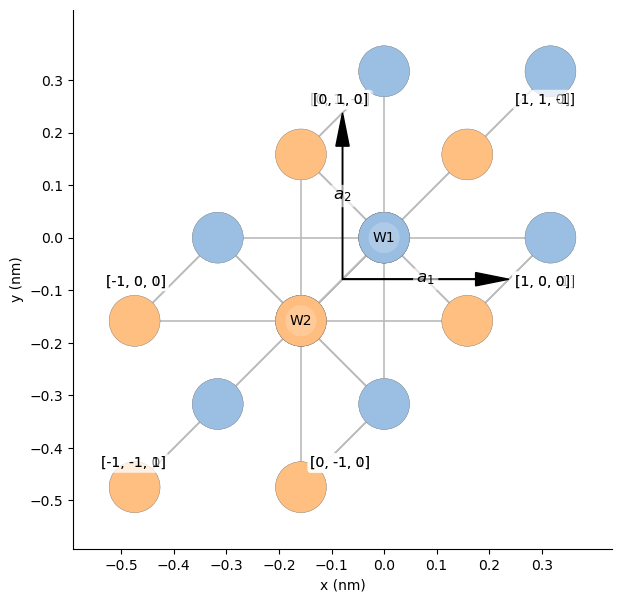

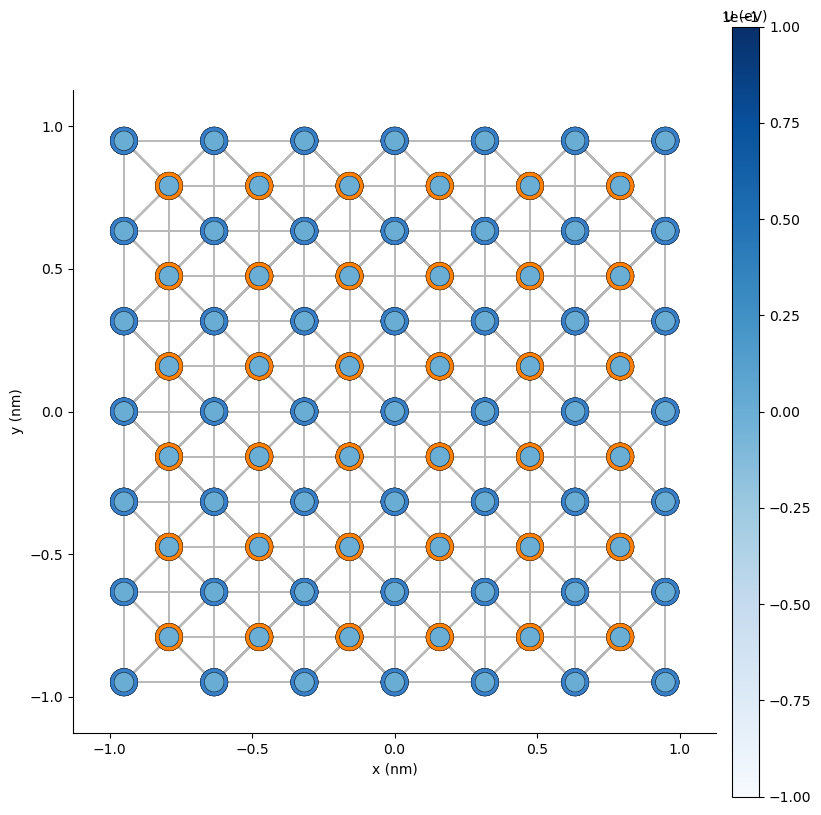

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pybinding as pb

def lattice_rotation(vec):
    return (rot @ vec.T).T

def tungsten():
    #Body centered cubic
    a = 0.3165

    a1 = lattice_rotation(np.array([a, 0, 0]))
    a2 = lattice_rotation(np.array([0, a, 0]))
    a3 = lattice_rotation(np.array([0, 0, a]))
    
    sub_W1 = lattice_rotation(np.array([   0,    0, -a/2]))
    sub_W2 = lattice_rotation(np.array([-a/2, -a/2,    0]))
    
    #sub_W1 = np.array([   0,    0, -a/2])
    #sub_W2 = np.array([-a/2, -a/2,    0])
    
    t0=2.5
    t1=2.0
    
    lat = pb.Lattice(a1, a2, a3)
    lat.add_sublattices(("W1", sub_W1),
                        ("W2", sub_W2),)

    hoppings = []

    #main cell
    for i in range(8):
        hoppings.append(([0, 0], 'W1', 'W' + str(i+2), t0))

    lat.add_hoppings(
        # inside the main cell
        ([0,  0,  0], 'W1', 'W2', t0),
        ([0,  1,  0], 'W1', 'W2', t0),
        ([1,  0,  0], 'W1', 'W2', t0),
        ([1,  1,  0], 'W1', 'W2', t0),
        
        ([0,  0, -1], 'W1', 'W2', t0),
        ([0,  1, -1], 'W1', 'W2', t0),
        ([1,  0, -1], 'W1', 'W2', t0),
        ([1,  1, -1], 'W1', 'W2', t0),
        
        ([0,  0, -1], 'W2', 'W2', t1),
        ([0,  1,  0], 'W2', 'W2', t1),
        ([1,  0,  0], 'W2', 'W2', t1),
        
        ([0,  0, -1], 'W1', 'W1', t1),
        ([0,  1,  0], 'W1', 'W1', t1),
        ([1,  0,  0], 'W1', 'W1', t1),
    )    

    print(a1, a2, a3)
    
    return lat

plt.rcParams['figure.figsize'] = [7, 7]
lattice = tungsten()
lattice.plot()
plt.show()

def rectangle(width, height):
    x0 = width / 2
    y0 = height / 2
    #vertices = [[x0, y0], [x0, -y0], [-x0, -y0], [-x0, y0]]
    vertices = np.array([[x0, y0, 0], [x0, -y0, 0], [-x0, -y0, 0], [-x0, y0, 0]])
    #vertices = lattice_rotation(vertices)
    return pb.Polygon(vertices)
    
def cube(lmodel):
    #vertices = np.array([[-1, -1, -1],
    #                     [ 1, -1, -1],
    #                     [ 1,  1, -1],
    #                     [-1,  1, -1],
    #                     [-1, -1, -1],
    #                     [-1, -1,  0],
    #                     [ 1, -1,  0],
    #                     [ 1,  1,  0],
    #                     [-1,  1,  0],
    #                     [-1, -1,  0],
    #                     [-1,  1,  0],
    #                     [-1,  1, -1],
    #                     [ 1,  1, -1],
    #                     [ 1,  1,  0],
    #                     [ 1, -1,  0],
    #                     [ 1, -1, -1]]) * (lmodel / 2)    
    
    vertices = np.array([[-1, -1, -1],
                         [ 1, -1, -1],
                         [ 1,  1, -1],
                         [-1,  1, -1],
                         [-1, -1, -1],
                         [-1, -1,  1],
                         [ 1, -1,  1],
                         [ 1,  1,  1],
                         [-1,  1,  1],
                         [-1, -1,  1],
                         [-1,  1,  1],
                         [-1,  1, -1],
                         [ 1,  1, -1],
                         [ 1,  1,  1],
                         [ 1, -1,  1],
                         [ 1, -1, -1]]) * (lmodel / 2)
    vertices = lattice_rotation(vertices)
    #vertices[:, 2] = 0

    return pb.Polygon(vertices)


l_model = 2
model = pb.Model(
    lattice, 
    #pb.translational_symmetry(),
    #circle(radius = R),
    rectangle(l_model,l_model),
    #cube(l_model,l_model,l_model),
    #vacancy([[0,0]], radius=0.1),
    #constant_magnetic_field(B=50)
    #extra_hopping(pos_extra_hop, coupling = coupling)
)

plt.figure(figsize=(10, 10))
model.plot()
model.onsite_map.plot(cmap="Blues", site_radius=0.04)
pb.pltutils.colorbar(label="U (eV)")
plt.show()

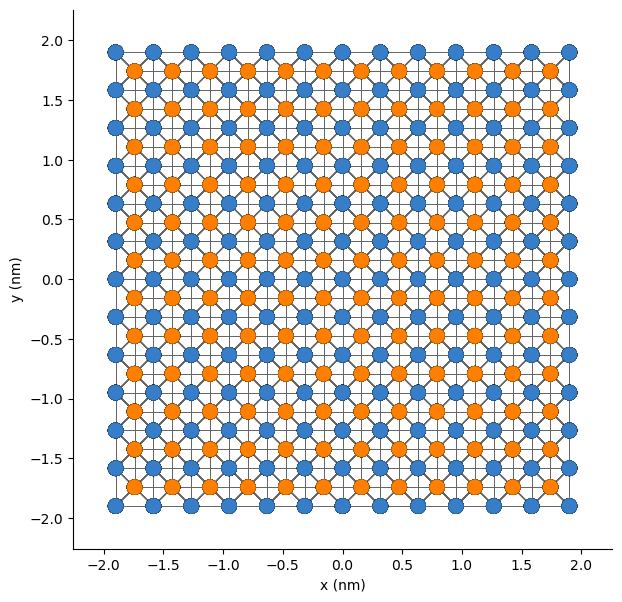

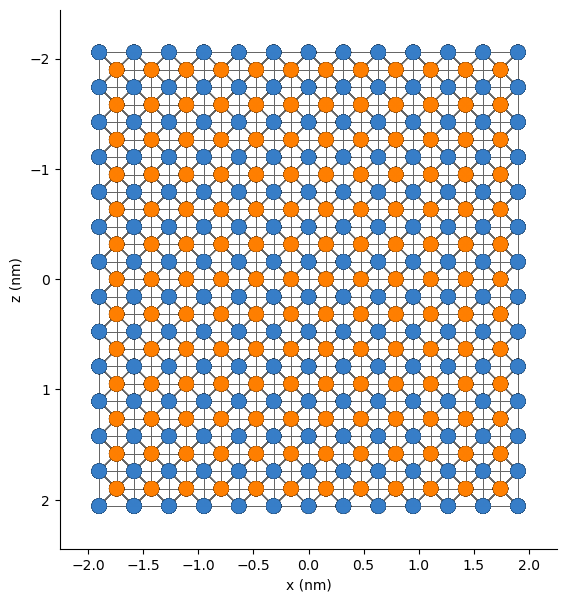

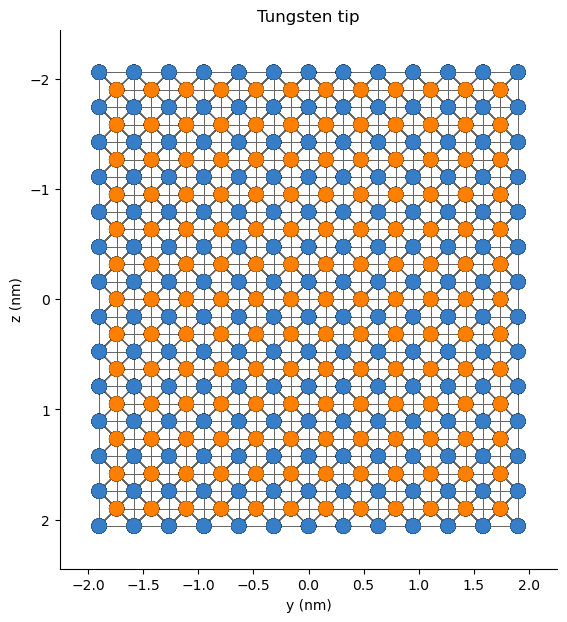

In [20]:

l_model = 4.0

def vacancy():
    @pb.site_state_modifier
    def modifier(state, x, y, z):
        #print(x,y,z)
        state[np.abs(z) > 2.1] = False
        # state[z < -0.7] = False
        # state[ x**2+y**2 > z**2] = False

        # th = -0.5
        # state[(x > 0) & (z > th)] = False
        
        return state
    return modifier

model = pb.Model(
    lattice, 
    #pb.translational_symmetry(),
    #circle(radius = R),
    # rectangle(l_model,l_model),
    cube(l_model),
    vacancy(),
    #constant_magnetic_field(B=50)
    #extra_hopping(pos_extra_hop, coupling = coupling)
)

print()

model.plot(axes = ['x', 'y'])
plt.show()
model.plot(axes = ['x', 'z'])
plt.gca().invert_yaxis()
plt.show()
model.plot(axes = ['y', 'z'])
plt.gca().invert_yaxis()
plt.title("Tungsten tip")
plt.show()

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:08 / ETA: 0:00:00


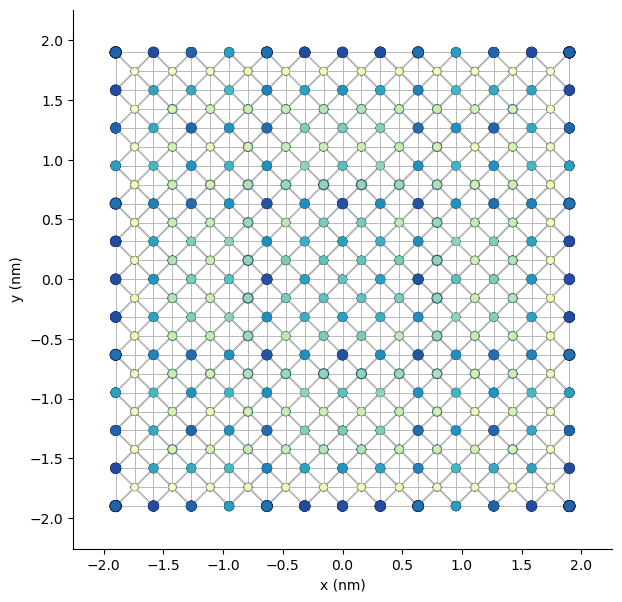

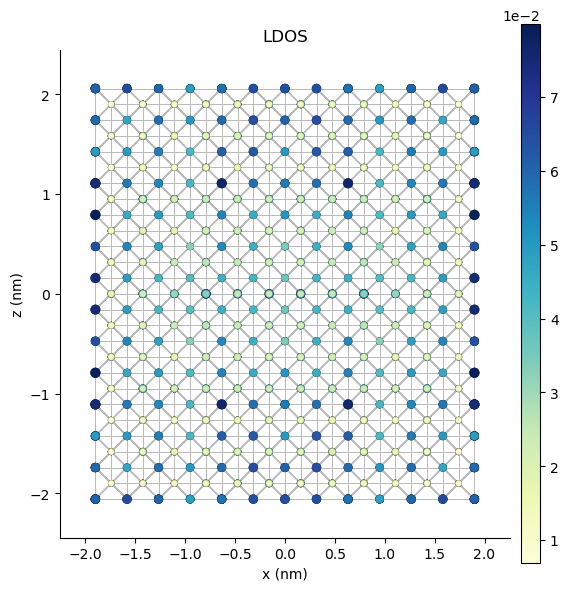

In [21]:
E_range = 1
E_reso = 200
gamma = 0.1 

kpm = pb.kpm(model)

energies = np.linspace(-E_range, E_range, E_reso)
l_ldos = l_model

spatial_ldos = kpm.calc_spatial_ldos(energy=energies, broadening=0.1, shape=cube(l_ldos))

smap = spatial_ldos.structure_map(0)
smap.plot(site_radius=(0.03, 0.05))
plt.show()
smap.plot(site_radius=(0.03, 0.05), axes = ['x', 'z'])
plt.title("LDOS")
pb.pltutils.colorbar(label="")
plt.show()

ldos_data = np.array(smap.data,ndmin=1)
ldos_positions = np.transpose(np.array(smap.positions))
#print ("positions are:", ldos_positions)
num_pts = ldos_positions.shape[0]
ldos = np.zeros((energies.shape[0], num_pts, 4)) #an array where I put all the LDOS at all energies
i=0
for energy in energies:
    smap = spatial_ldos.structure_map(energy)
    ldos_data = np.array(smap.data,ndmin=1)
    ldos_positions = np.transpose(np.array(smap.positions))
    ldos[i,:,0:3] = ldos_positions[:,0:3]
    ldos[i,:,3] = ldos_data
    i +=1

-1.8990001678466797 1.8989999294281006
-1.8990001678466797 1.8989999294281006
-1.8990001678466797 1.8989999294281006
(3900, 2)


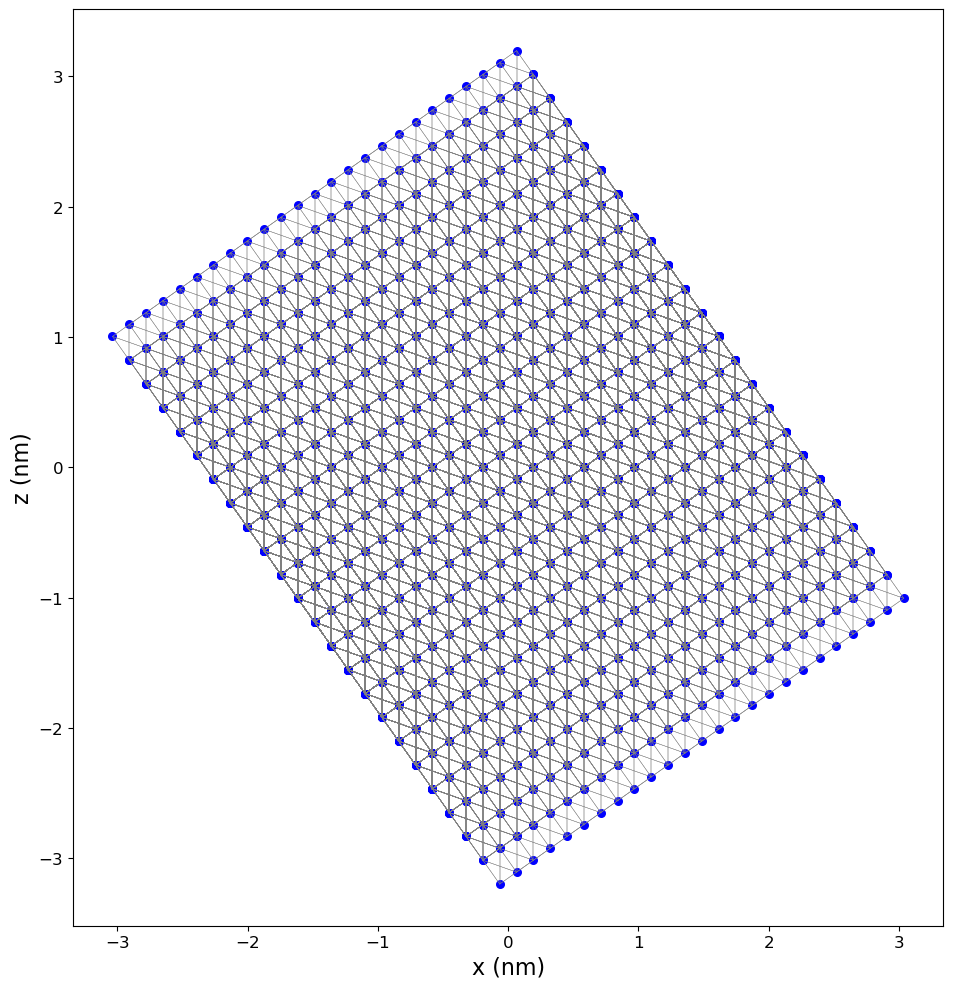

In [28]:
print(ldos[:, :, 0].min(), ldos[:, :, 0].max())

print(ldos[:, :, 1].min(), ldos[:, :, 1].max())

print(ldos[:, :, 2].min(), ldos[:, :, 2].max())



#plt.scatter(ldos[:, :, 0], ldos[:, :, 1])
#plt.show()
#plt.scatter(ldos[:, :, 1], ldos[:, :, 2])
#plt.show()
#plt.scatter(ldos[:, :, 0], ldos[:, :, 2])
#plt.show()

plt.rcParams['axes.labelsize'] = 16       # x and y axis labels
plt.rcParams['xtick.labelsize'] = 12      # x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12      # y-axis tick labels

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Colors for sublattices
colors = ['tab:blue', 'tab:orange']

positions = ldos[0, :, :3]
# positions = positions[positions[:, 2] >= 0.0, :]
    
rotation = rot2 @ rot1
positions = (rotation @ positions.T).T

sites = positions[:, [0, 2]]

print(sites.shape)

for i in range(len(sites)):
    ax.scatter(sites[i,0], sites[i,1], color='blue', s=30)

# Draw nearest-neighbor bonds (simple brute force)
from scipy.spatial import KDTree

tree = KDTree(sites)
pairs = tree.query_pairs(r=a*1.05)  # bond cutoff

for i, j in pairs:
    xi, yi = sites[i]
    xj, yj = sites[j]
    ax.plot([xi, xj], [yi, yj], color='gray', lw=0.3)

# plt.figure(figsize=(10, 10))
ax.set_aspect('equal')
#ax.axis('off')
plt.xlabel("x (nm)")
plt.ylabel("z (nm)")
# plt.title("Tungsten (111) Tip")
plt.tight_layout()
plt.show()

In [25]:
print(rotation)
print(rotation.T @ rotation)

[[ 0.81649658 -0.40824829 -0.40824829]
 [ 0.          0.70710678 -0.70710678]
 [ 0.57735027  0.57735027  0.57735027]]
[[ 1.00000000e+00  4.39774161e-17  4.39774161e-17]
 [ 4.39774161e-17  1.00000000e+00 -2.94613014e-18]
 [ 4.39774161e-17 -2.94613014e-18  1.00000000e+00]]


(3612, 2)


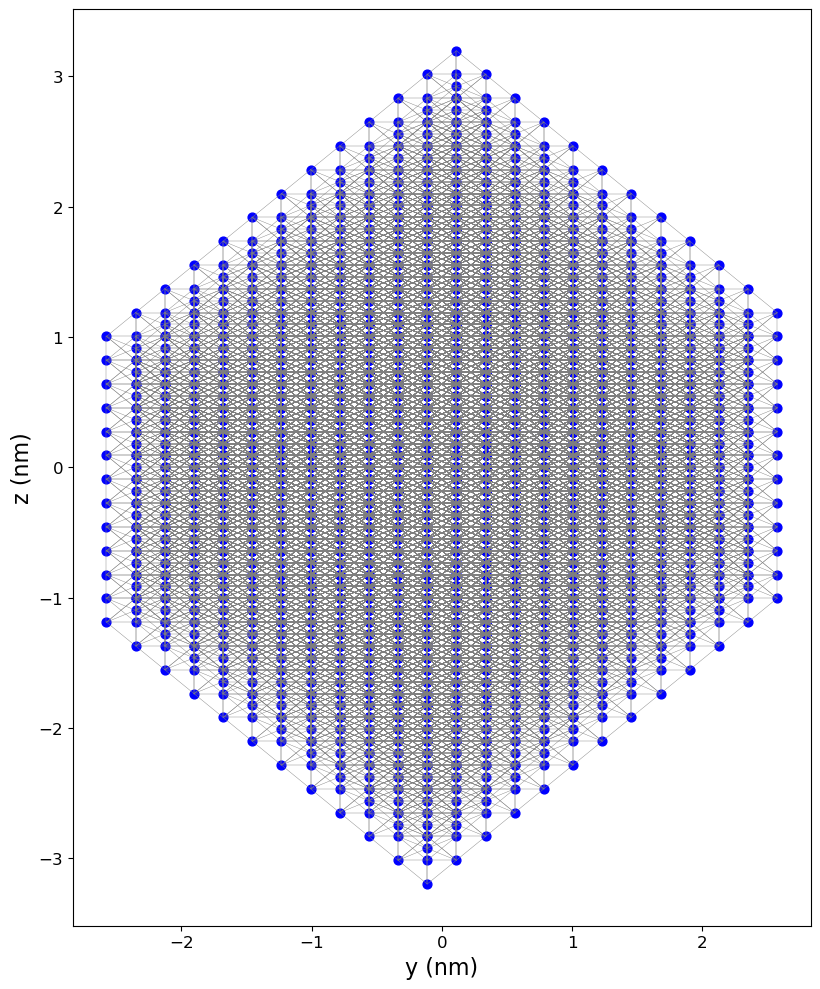

In [20]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Colors for sublattices
colors = ['tab:blue', 'tab:orange']

positions = ldos[0, :, :3]
# positions = positions[positions[:, 2] >= 0.0, :]
rotation = rot2 @ rot1
positions = (rotation @ positions.T).T

sites = positions[:, [1, 2]]

print(sites.shape)

for i in range(len(sites)):
    ax.scatter(sites[i,0], sites[i,1], color='blue', s=40)

# Draw nearest-neighbor bonds (simple brute force)
from scipy.spatial import KDTree

tree = KDTree(sites)
pairs = tree.query_pairs(r=a*1.05)  # bond cutoff

for i, j in pairs:
    xi, yi = sites[i]
    xj, yj = sites[j]
    ax.plot([xi, xj], [yi, yj], color='gray', lw=0.3)

plt.xlabel("y (nm)")
plt.ylabel("z (nm)")
ax.set_aspect('equal')
#ax.axis('off')
plt.tight_layout()
plt.show()

In [22]:
offsets = np.array([ldos[0, :, 0].min(), ldos[0, :, 1].min(), ldos[0, :, 2].min()])

pos = ldos[0, :, :3] - offsets[None, :]
dists = pos[:, 0] + pos[:, 1] + pos[:, 2]

#dists = np.sqrt((ldos[0, :, 0] - ldos[0, :, 0].min()) ** 2 + (ldos[0, :, 1] - ldos[0, :, 1].min()) ** 2 + (ldos[0, :, 2] - ldos[0, :, 2].min()) ** 2)
sorted = np.argsort(dists)

thr = 8
print(dists[sorted[:thr]])

plane_dists = []
plane_inds = []
def is_equal(x, y):
    return np.abs(x - y) < 1e-3

indices = sorted[:thr]

plane_dists.append(0.0)
plane_inds.append([indices[0]])

for ind in indices[1:]:
    if not is_equal(dists[ind], plane_dists[-1]):
        plane_dists.append(dists[ind])
        plane_inds.append([ind])
    else:
        plane_inds[-1].append(ind)


[0.         0.31650007 0.31650007 0.31650007 0.47475004 0.63300014
 0.63300014 0.63300014]


In [23]:
print(offsets)
print([ldos[0, :, 0].max(), ldos[0, :, 1].max(), ldos[0, :, 2].max()])

[-1.89900017 -1.89900017 -2.05725026]
[1.8989999294281006, 1.8989999294281006, 2.0572500228881836]


In [24]:
print(plane_dists, plane_inds)

[0.0, 0.31650006771087646, 0.4747500419616699, 0.6330001354217529] [[0], [1, 169, 13], [2366], [14, 182, 170]]


In [25]:
print(pos[plane_inds[1], :])

[[0.31650007 0.         0.        ]
 [0.         0.         0.31650007]
 [0.         0.31650007 0.        ]]


In [26]:
plane_inds[1]

[1, 169, 13]

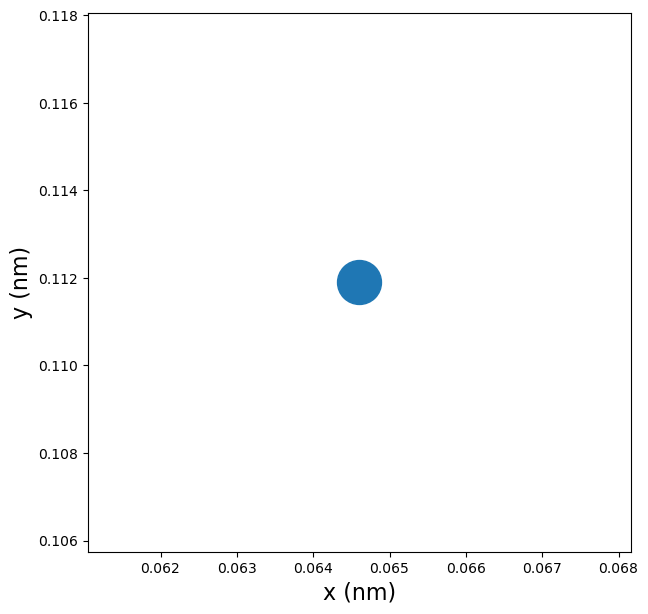

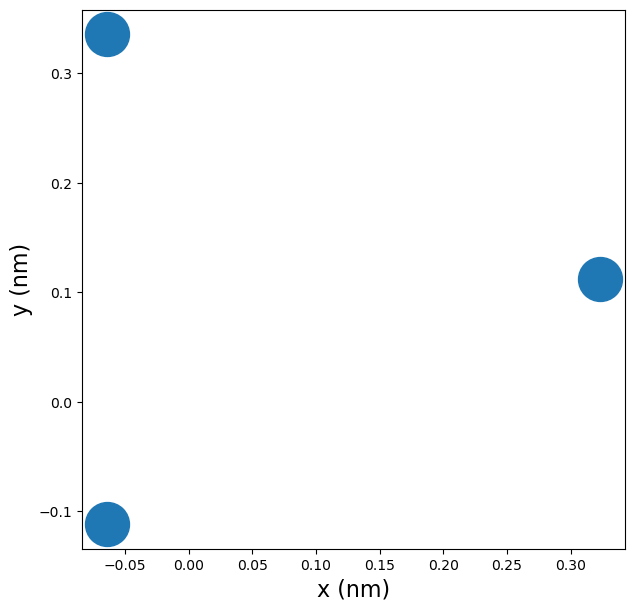

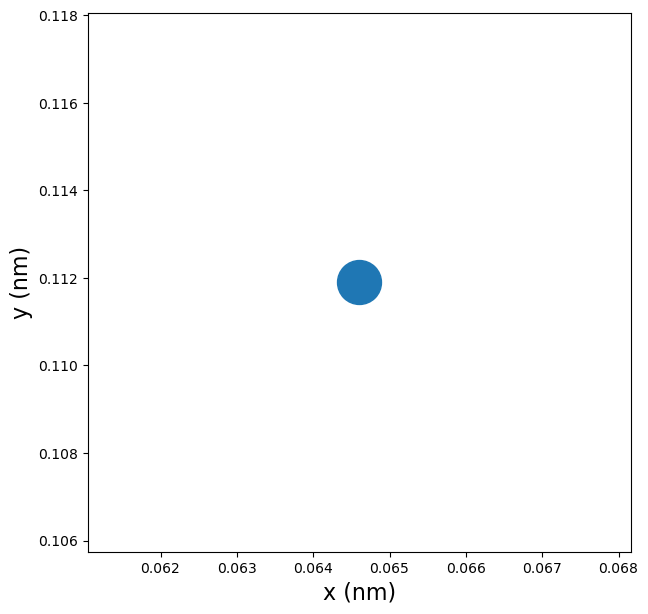

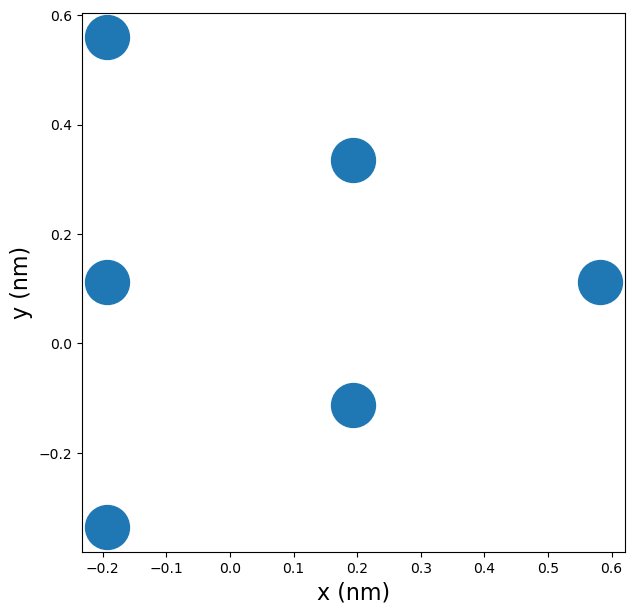

In [31]:
l_model = 4.0

for plane_ind in range(len(plane_dists)):
    def vacancy():
        @pb.site_state_modifier
        def modifier(state, x, y, z):
            xp = x - offsets[0]
            yp = y - offsets[1]
            zp = z - offsets[2]
            
            state[xp < 0.0] = False
            state[yp < 0.0] = False
            state[zp < 0.0] = False
            
            state[xp + yp + zp < plane_dists[plane_ind] - 1e-3] = False
            mask = (xp + yp + zp < plane_dists[plane_ind] - 1e-3) & (xp >= 0.0) & (yp >= 0.0) & (zp >= 0.0)
            #print(xp[mask], yp[mask], zp[mask], ";", plane_dists[plane_ind])
            
            return state
        return modifier
    
    model = pb.Model(
        lattice, 
        cube(l_model),
        vacancy(),
    )

    E_range = 1
    E_reso = 200
    gamma = 0.1 
    
    kpm = pb.kpm(model)
    
    energies = np.linspace(-E_range, E_range, E_reso)
    l_ldos = l_model
    
    spatial_ldos = kpm.calc_spatial_ldos(energy=energies, broadening=0.1, shape=cube(l_ldos))
    
    smap = spatial_ldos.structure_map(0)
    
    ldos_data = np.array(smap.data,ndmin=1)
    ldos_positions = np.transpose(np.array(smap.positions))

    rotation = rot2 @ rot1
    ldos_positions = (rotation @ ldos_positions.T).T

    minimum = ldos_positions[:, 2].min()
    mask = (ldos_positions[:, 2] - minimum) < 1e-3
    print(minimum)
    plt.scatter(ldos_positions[mask, 0], ldos_positions[mask, 1], s = 1000)
    plt.xlabel("x (nm)", fontsize=16)
    plt.ylabel("y (nm)", fontsize=16)
    plt.show()

[[0]
 [1]]
[]
[]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.5632618388166315


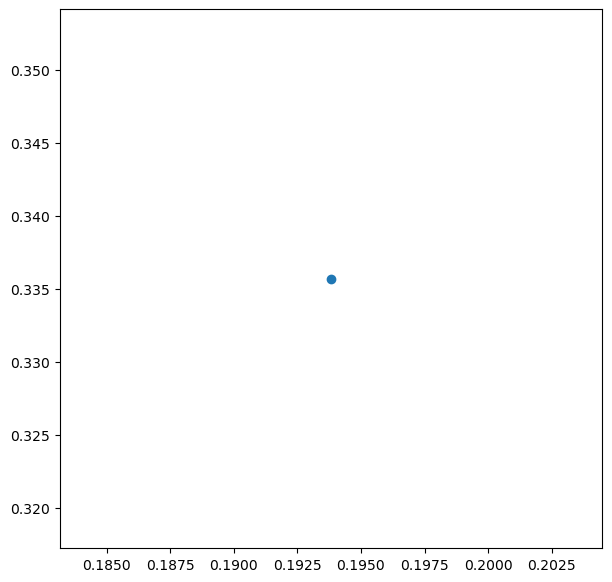

[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[]
[]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.3805305083507373


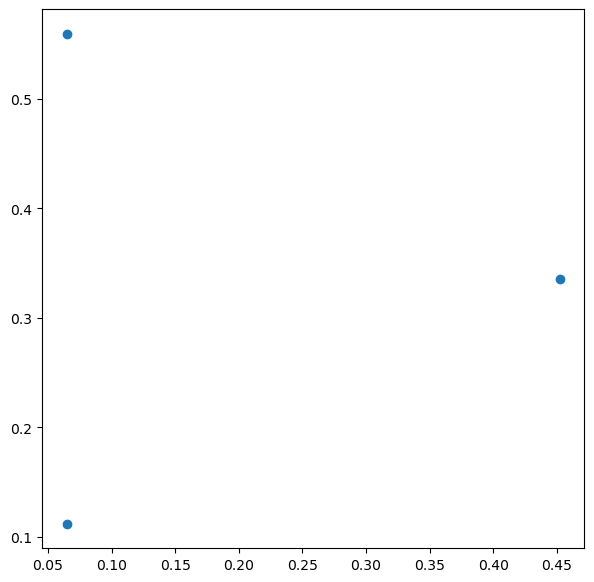

[2]
ind; 2 pos; [0.         0.31650007 0.        ]
[2]
ind; 2 pos; [0.         0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.3805305083507373


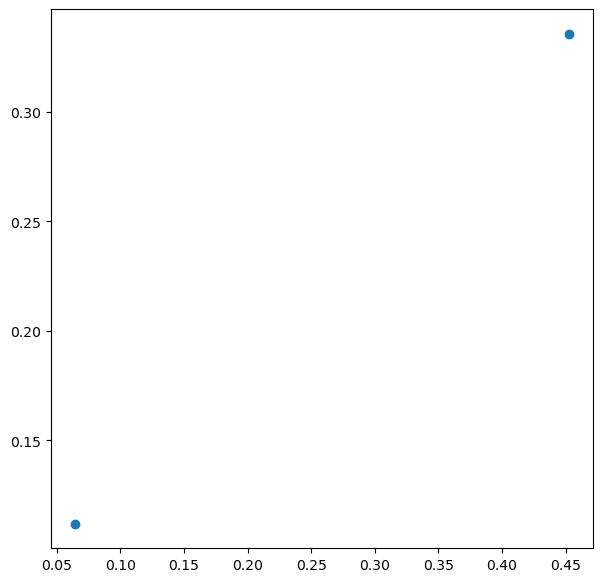

[1]
ind; 1 pos; [0.31650007 0.         0.        ]
[1]
ind; 1 pos; [0.31650007 0.         0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.3805305083507373


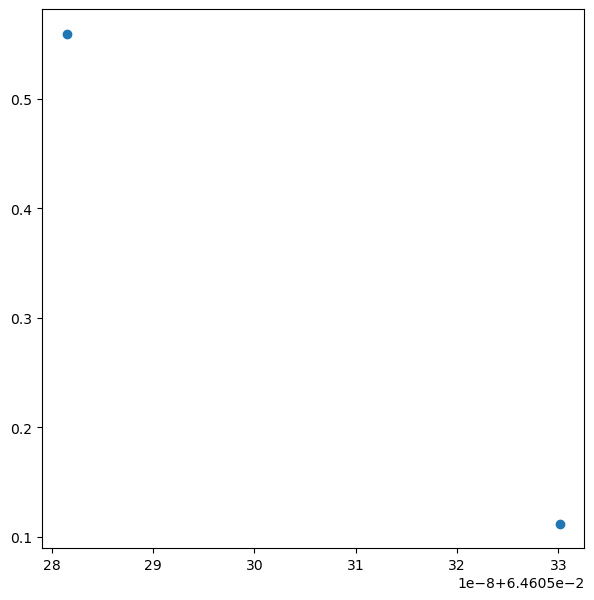

[1 2]
ind; 1 pos; [0.31650007 0.         0.        ]
ind; 2 pos; [0.         0.31650007 0.        ]
[1 2]
ind; 1 pos; [0.31650007 0.         0.        ]
ind; 2 pos; [0.         0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.3805305083507373


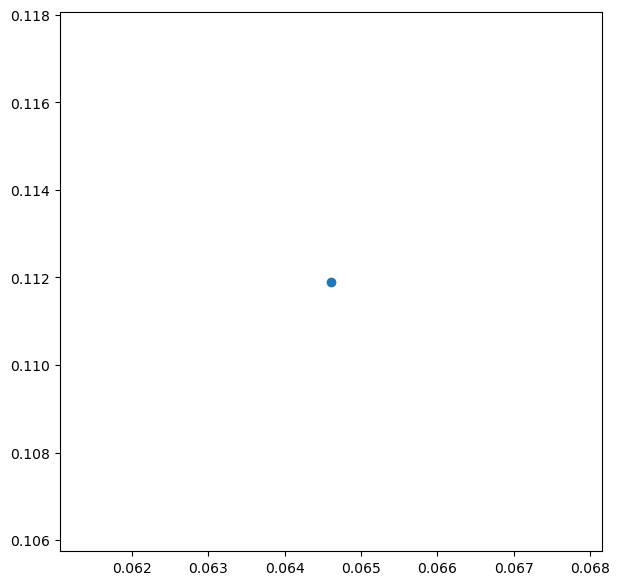

[0]
ind; 0 pos; [0.         0.         0.31649995]
[0]
ind; 0 pos; [0.         0.         0.31649995]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.3805304395252223


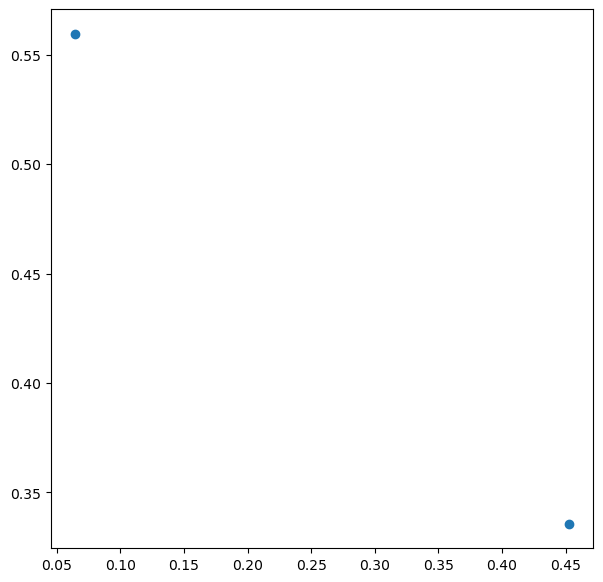

[0 2]
ind; 0 pos; [0.         0.         0.31649995]
ind; 2 pos; [0.         0.31650007 0.        ]
[0 2]
ind; 0 pos; [0.         0.         0.31649995]
ind; 2 pos; [0.         0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.3805304395252223


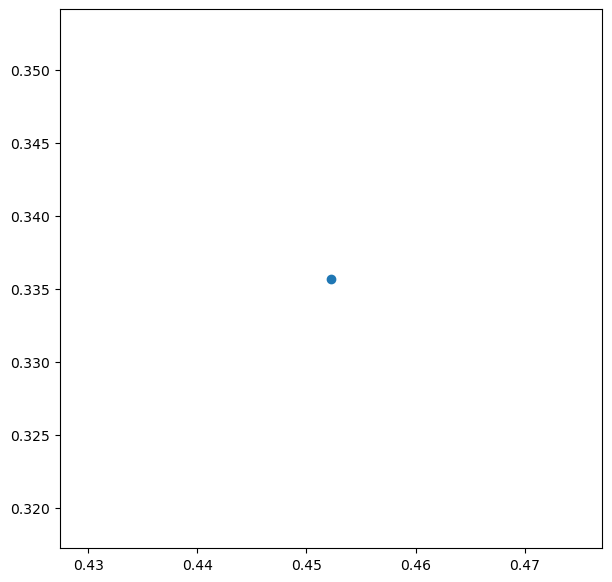

[0 1]
ind; 0 pos; [0.         0.         0.31649995]
ind; 1 pos; [0.31650007 0.         0.        ]
[0 1]
ind; 0 pos; [0.         0.         0.31649995]
ind; 1 pos; [0.31650007 0.         0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.3805304395252223


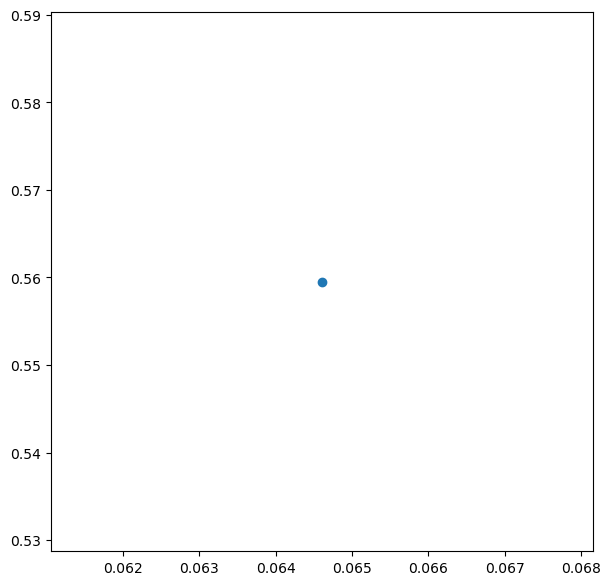

[[0]
 [1]]
[]
[]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.2891647742922756


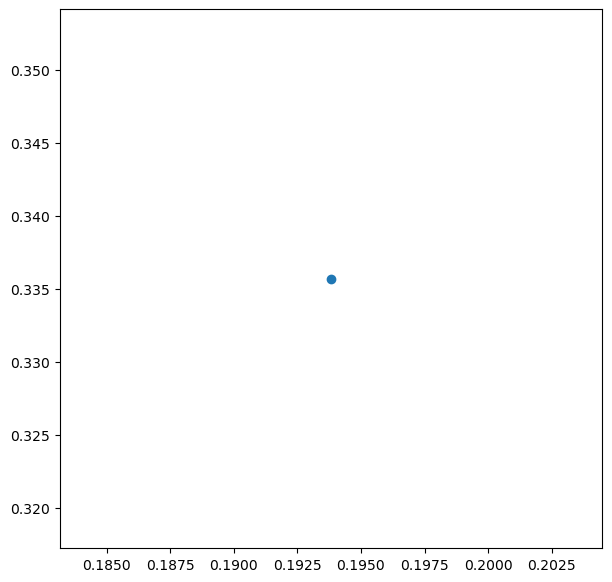

[[0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 0 0 1 1]
 [0 0 0 1 0 0]
 [0 0 0 1 0 1]
 [0 0 0 1 1 0]
 [0 0 0 1 1 1]
 [0 0 1 0 0 0]
 [0 0 1 0 0 1]
 [0 0 1 0 1 0]
 [0 0 1 0 1 1]
 [0 0 1 1 0 0]
 [0 0 1 1 0 1]
 [0 0 1 1 1 0]
 [0 0 1 1 1 1]
 [0 1 0 0 0 0]
 [0 1 0 0 0 1]
 [0 1 0 0 1 0]
 [0 1 0 0 1 1]
 [0 1 0 1 0 0]
 [0 1 0 1 0 1]
 [0 1 0 1 1 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [0 1 1 0 0 1]
 [0 1 1 0 1 0]
 [0 1 1 0 1 1]
 [0 1 1 1 0 0]
 [0 1 1 1 0 1]
 [0 1 1 1 1 0]
 [0 1 1 1 1 1]
 [1 0 0 0 0 0]
 [1 0 0 0 0 1]
 [1 0 0 0 1 0]
 [1 0 0 0 1 1]
 [1 0 0 1 0 0]
 [1 0 0 1 0 1]
 [1 0 0 1 1 0]
 [1 0 0 1 1 1]
 [1 0 1 0 0 0]
 [1 0 1 0 0 1]
 [1 0 1 0 1 0]
 [1 0 1 0 1 1]
 [1 0 1 1 0 0]
 [1 0 1 1 0 1]
 [1 0 1 1 1 0]
 [1 0 1 1 1 1]
 [1 1 0 0 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 1 0]
 [1 1 0 0 1 1]
 [1 1 0 1 0 0]
 [1 1 0 1 0 1]
 [1 1 0 1 1 0]
 [1 1 0 1 1 1]
 [1 1 1 0 0 0]
 [1 1 1 0 0 1]
 [1 1 1 0 1 0]
 [1 1 1 0 1 1]
 [1 1 1 1 0 0]
 [1 1 1 1 0 1]
 [1 1 1 1 1 0]
 [1 1 1 1 1 1]]
[]
[]
Computing KPM moments...
Progress

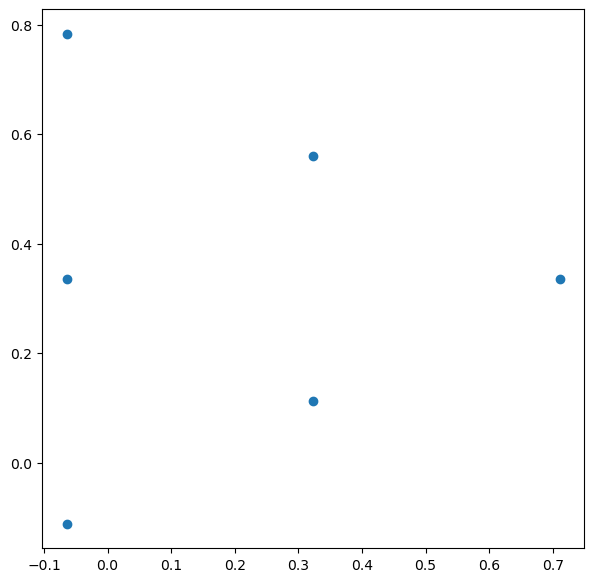

[5]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[5]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:10 / ETA: 0:00:00
-3.197799109059328


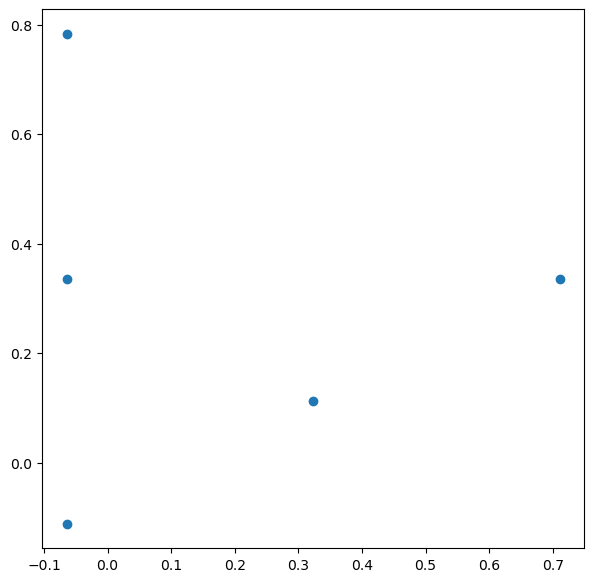

[4]
ind; 4 pos; [0.         0.63300014 0.        ]
[4]
ind; 4 pos; [0.         0.63300014 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


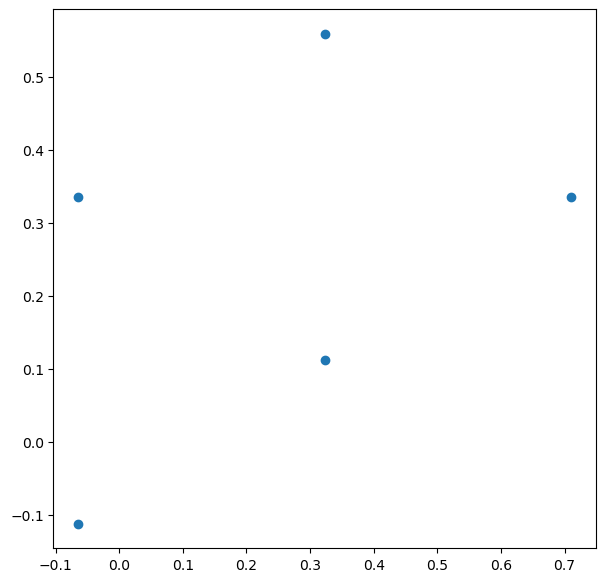

[4 5]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[4 5]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


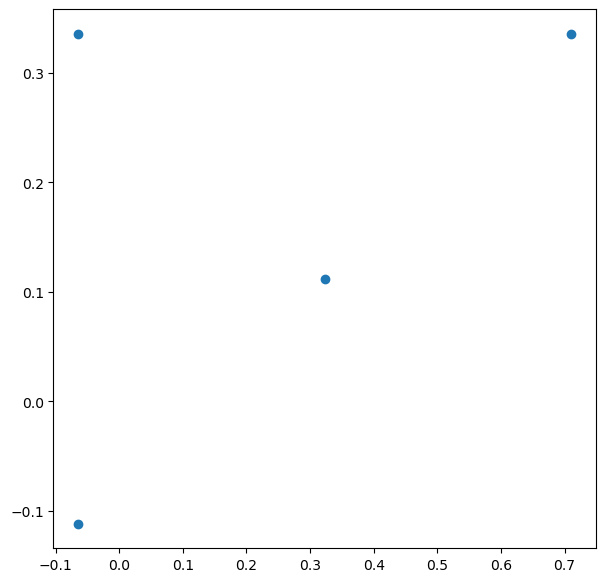

[3]
ind; 3 pos; [0.63300014 0.         0.        ]
[3]
ind; 3 pos; [0.63300014 0.         0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


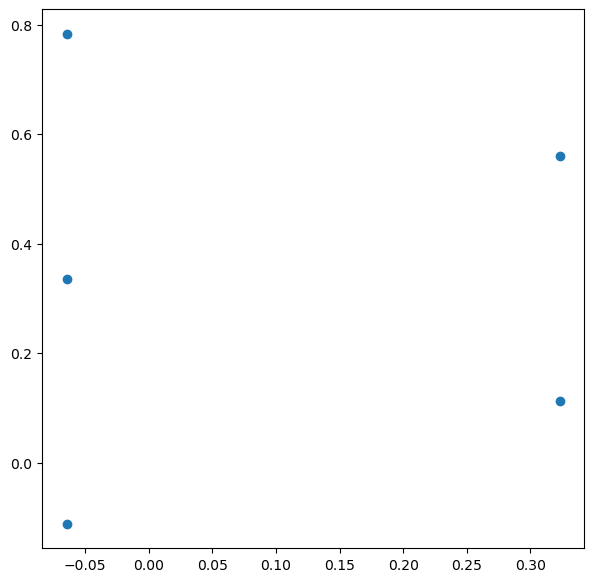

[3 5]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[3 5]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


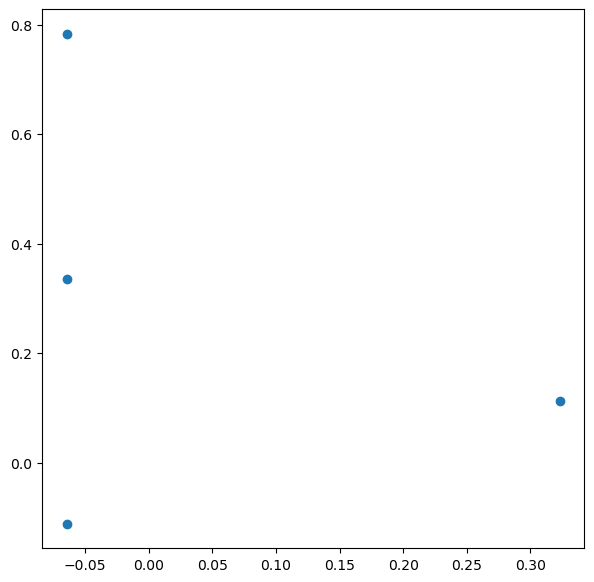

[3 4]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
[3 4]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


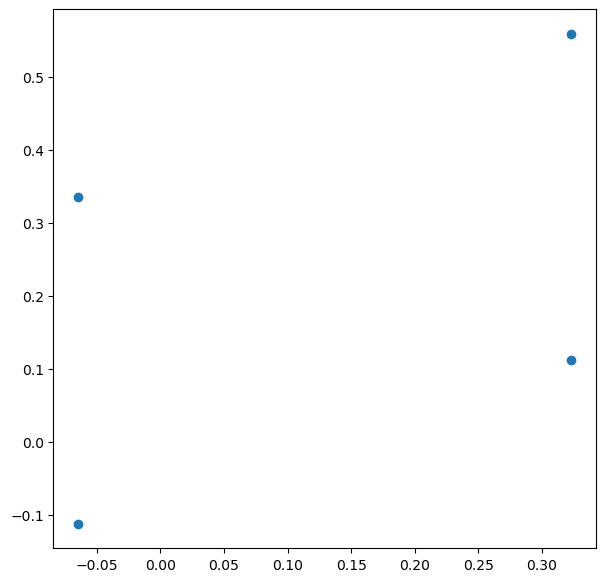

[3 4 5]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[3 4 5]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


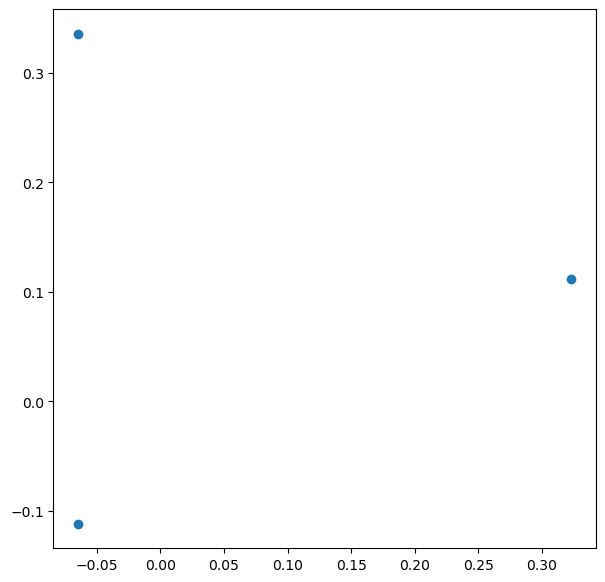

[2]
ind; 2 pos; [0.         0.         0.63300002]
[2]
ind; 2 pos; [0.         0.         0.63300002]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


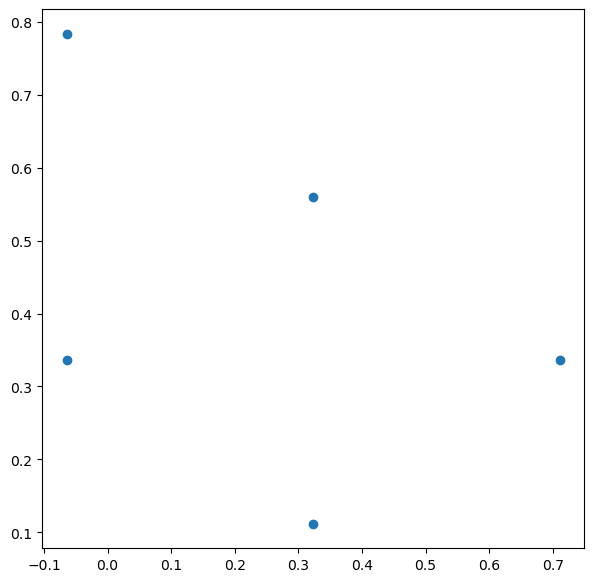

[2 5]
ind; 2 pos; [0.         0.         0.63300002]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[2 5]
ind; 2 pos; [0.         0.         0.63300002]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


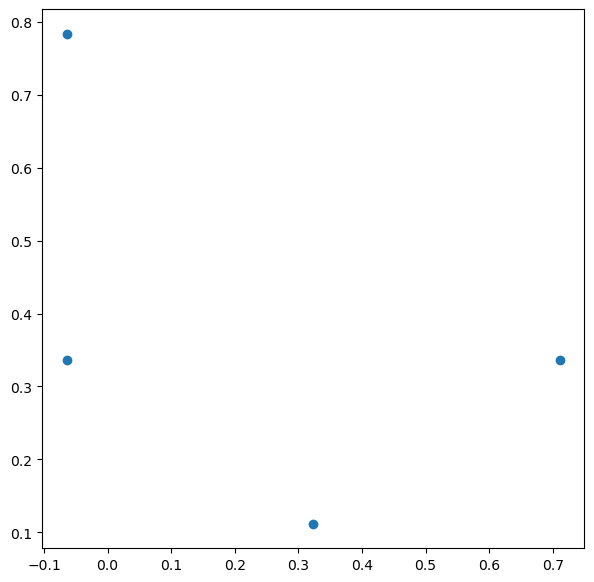

[2 4]
ind; 2 pos; [0.         0.         0.63300002]
ind; 4 pos; [0.         0.63300014 0.        ]
[2 4]
ind; 2 pos; [0.         0.         0.63300002]
ind; 4 pos; [0.         0.63300014 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


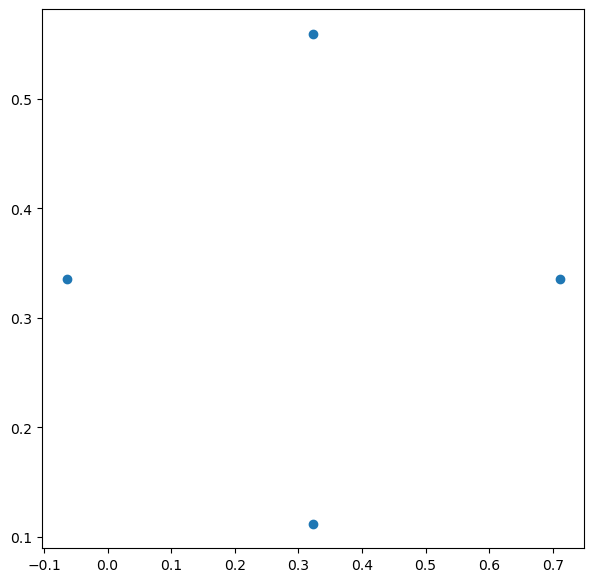

[2 4 5]
ind; 2 pos; [0.         0.         0.63300002]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[2 4 5]
ind; 2 pos; [0.         0.         0.63300002]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


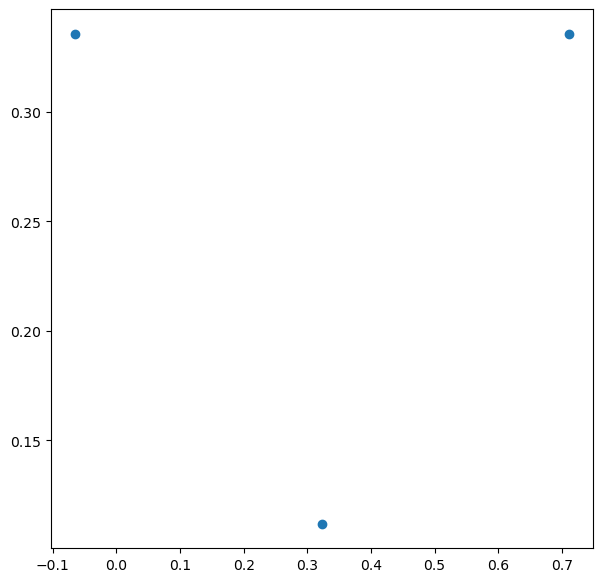

[2 3]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
[2 3]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


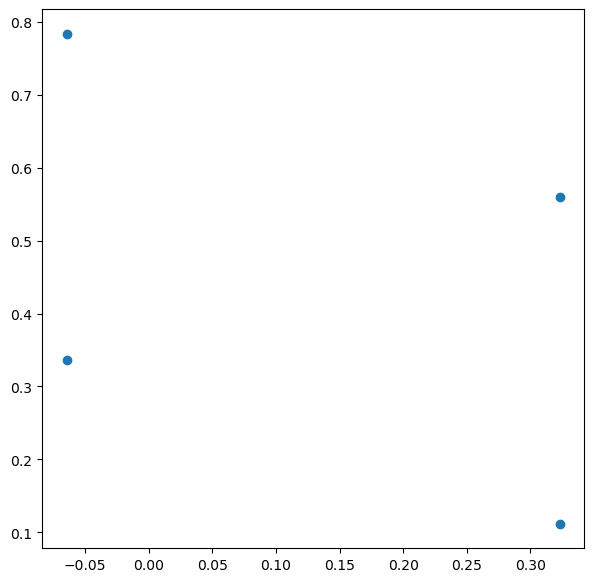

[2 3 5]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[2 3 5]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


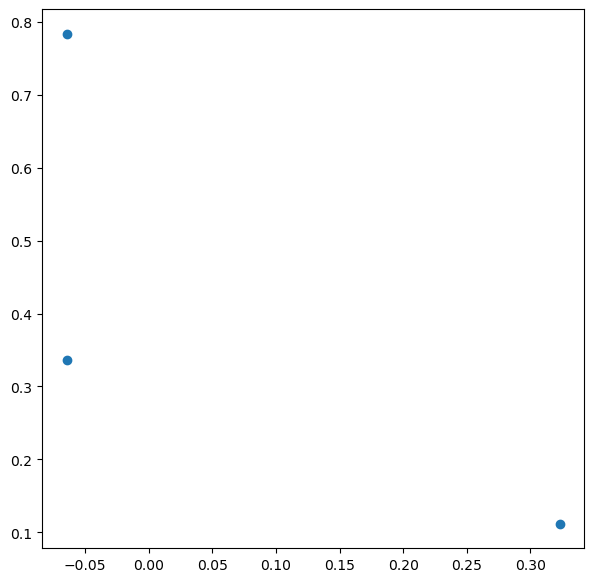

[2 3 4]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
[2 3 4]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


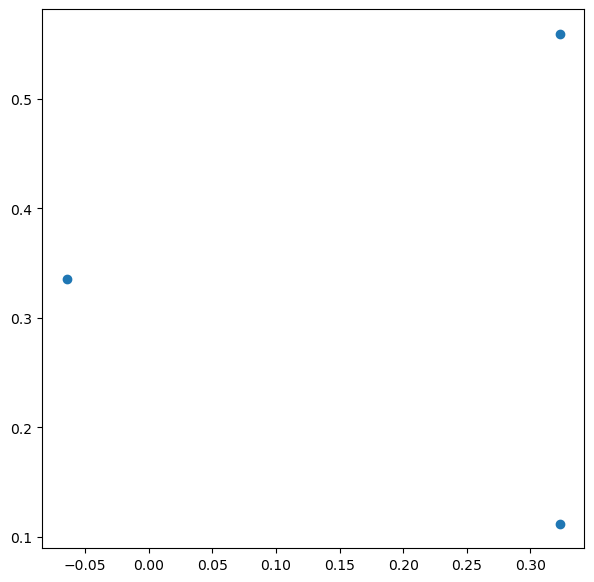

[2 3 4 5]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[2 3 4 5]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


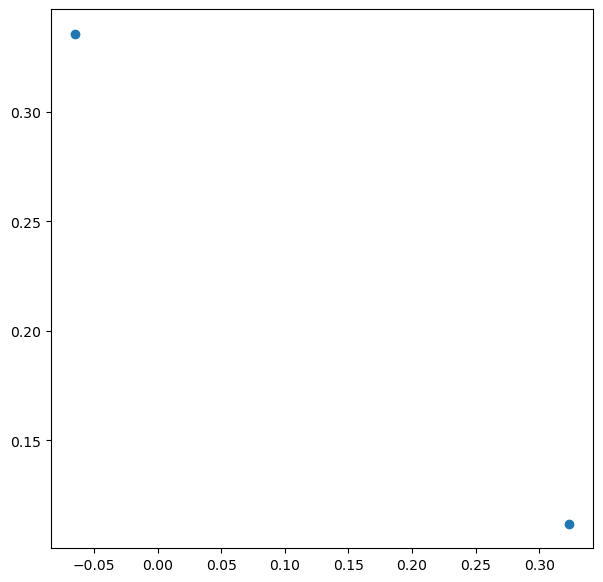

[1]
ind; 1 pos; [0.31650007 0.         0.31649995]
[1]
ind; 1 pos; [0.31650007 0.         0.31649995]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


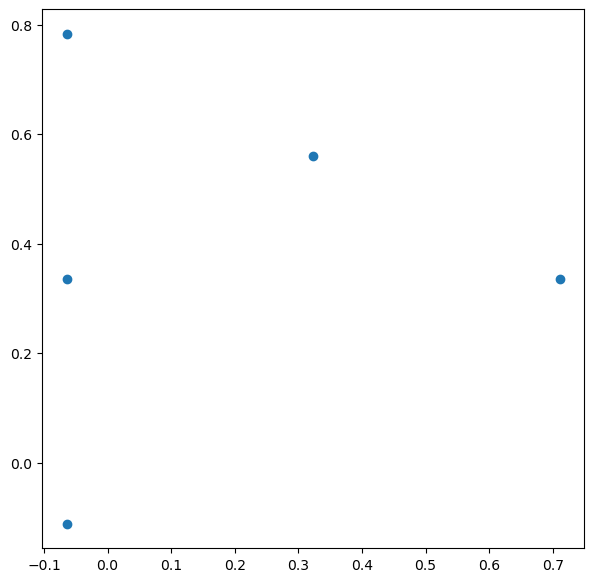

[1 5]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[1 5]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


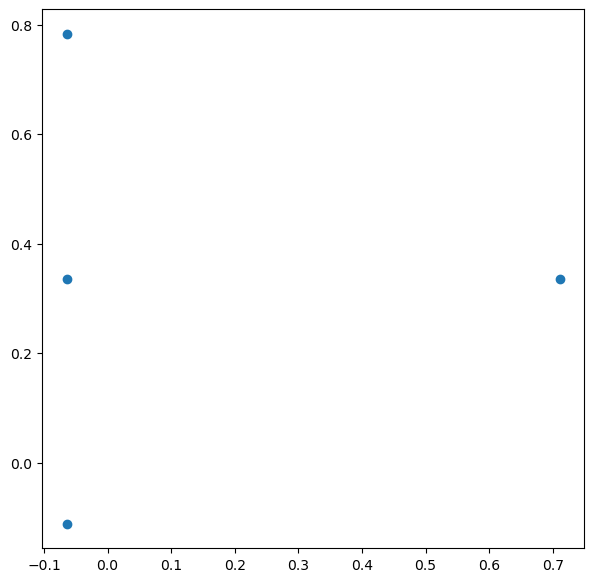

[1 4]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 4 pos; [0.         0.63300014 0.        ]
[1 4]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 4 pos; [0.         0.63300014 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


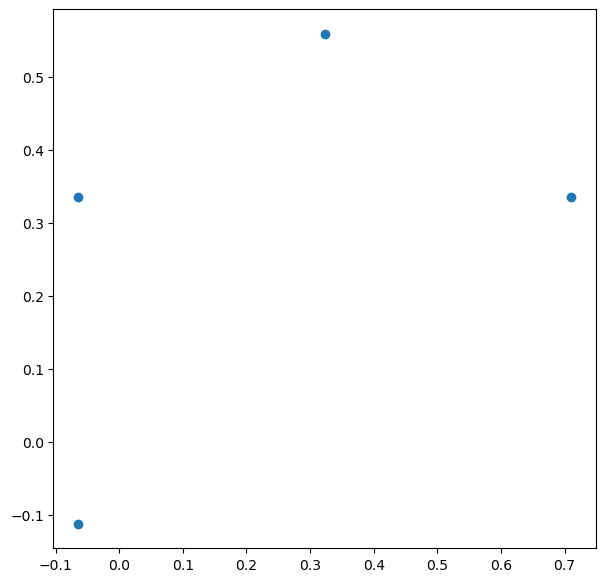

[1 4 5]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[1 4 5]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


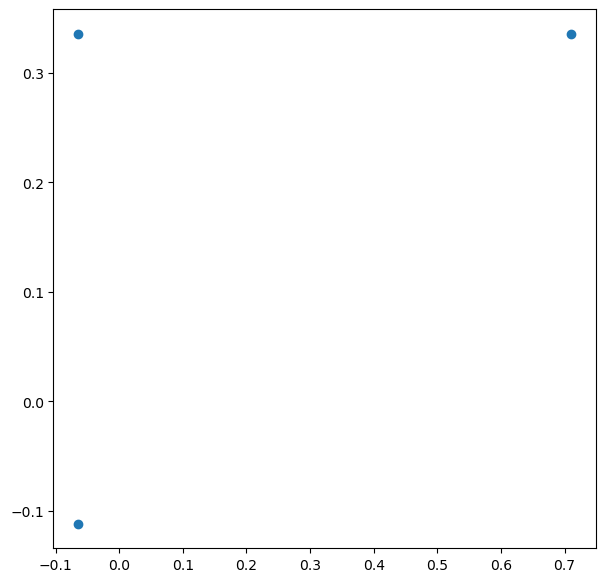

[1 3]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
[1 3]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


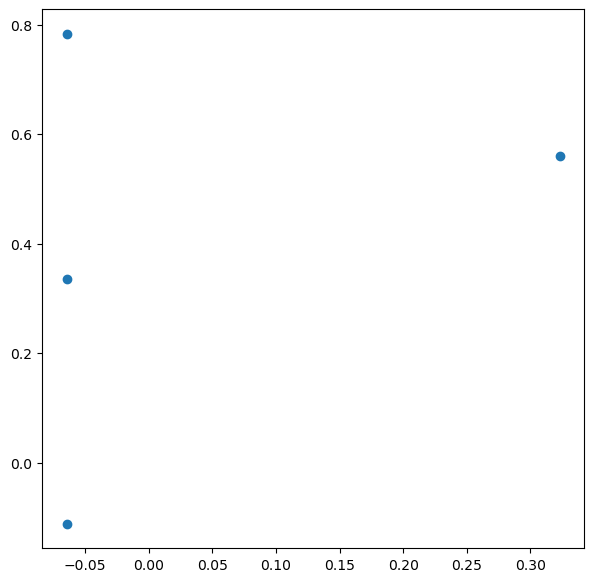

[1 3 5]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[1 3 5]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


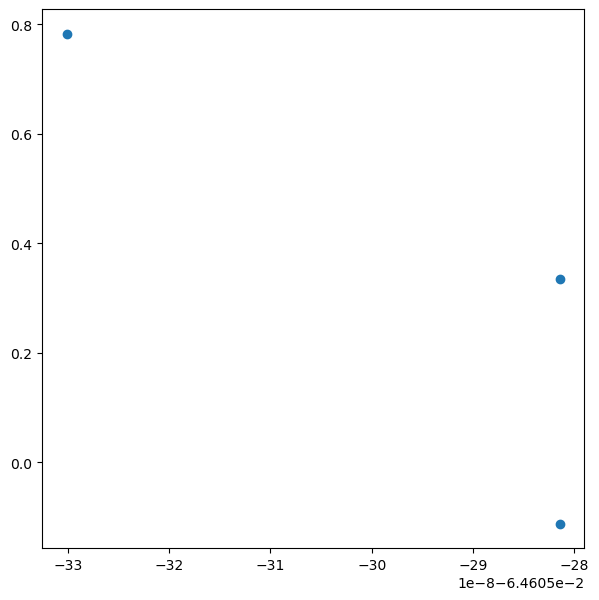

[1 3 4]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
[1 3 4]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


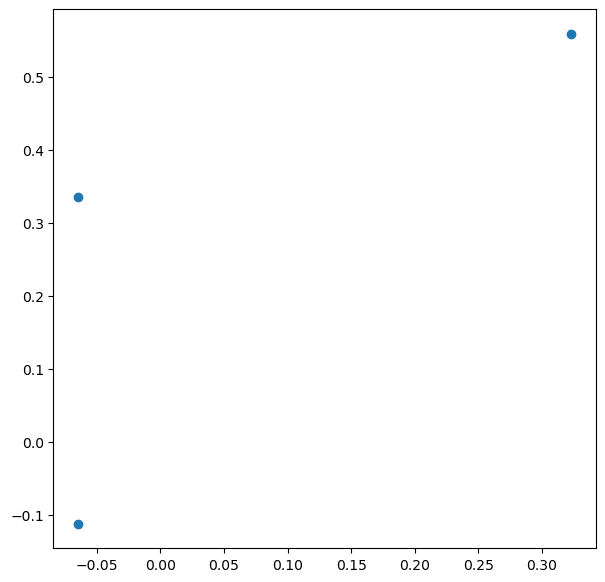

[1 3 4 5]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[1 3 4 5]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


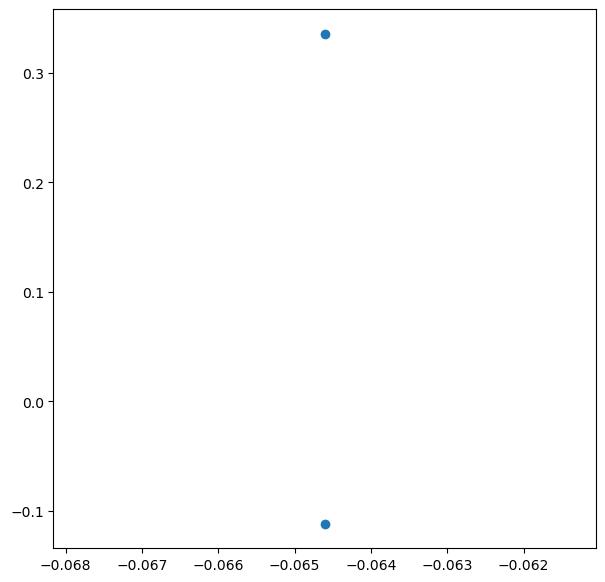

[1 2]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
[1 2]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


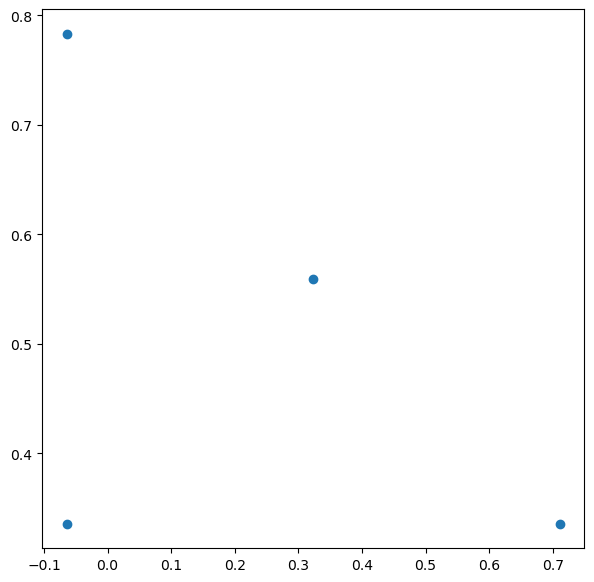

[1 2 5]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[1 2 5]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


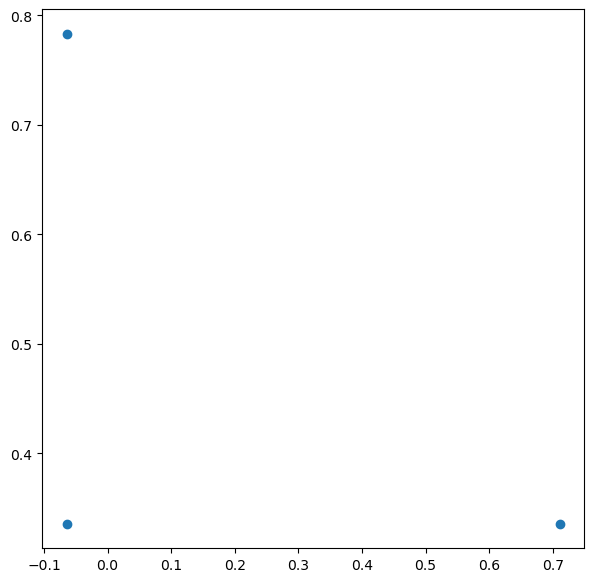

[1 2 4]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 4 pos; [0.         0.63300014 0.        ]
[1 2 4]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 4 pos; [0.         0.63300014 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


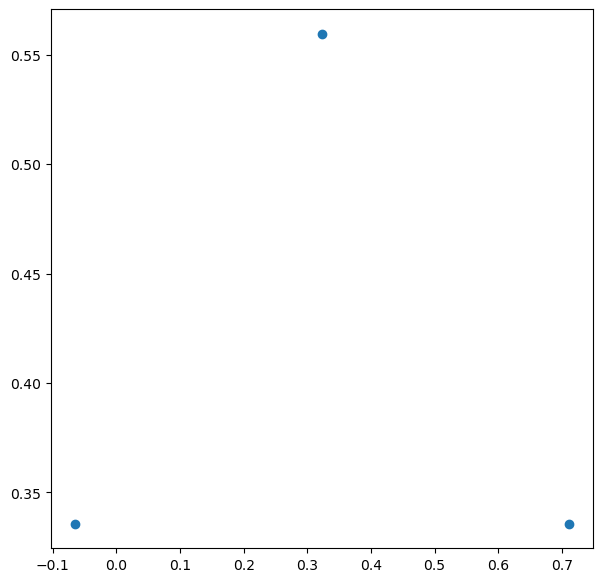

[1 2 4 5]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[1 2 4 5]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


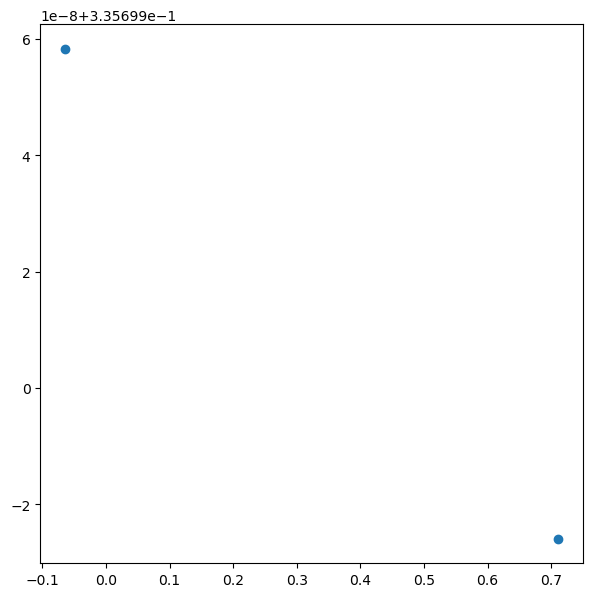

[1 2 3]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
[1 2 3]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


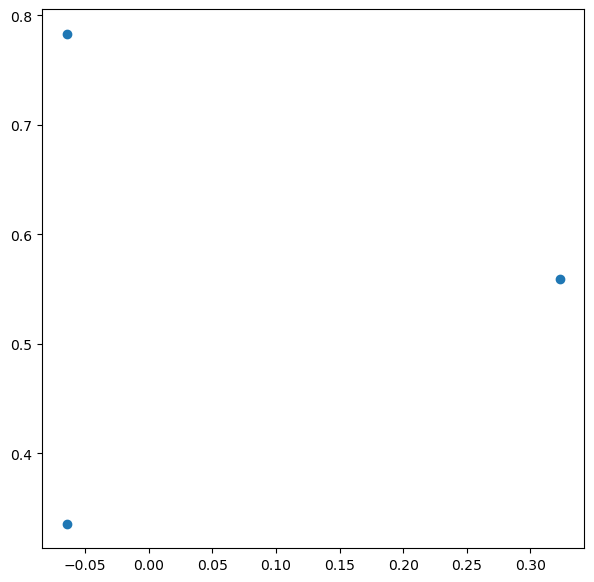

[1 2 3 5]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[1 2 3 5]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


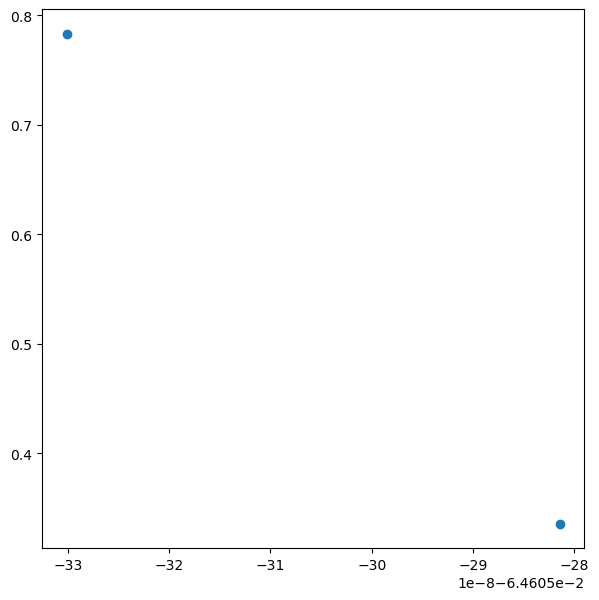

[1 2 3 4]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
[1 2 3 4]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


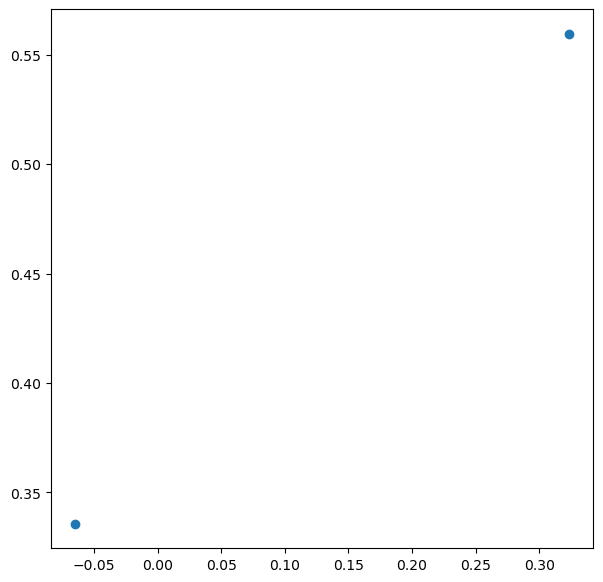

[1 2 3 4 5]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[1 2 3 4 5]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


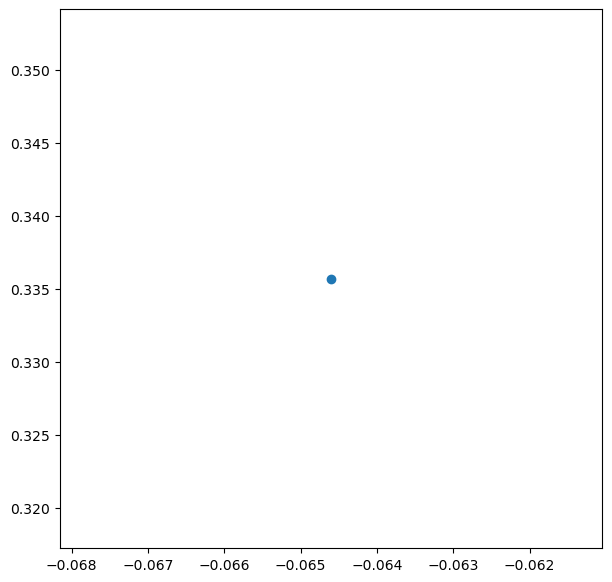

[0]
ind; 0 pos; [0.         0.31650007 0.31649995]
[0]
ind; 0 pos; [0.         0.31650007 0.31649995]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


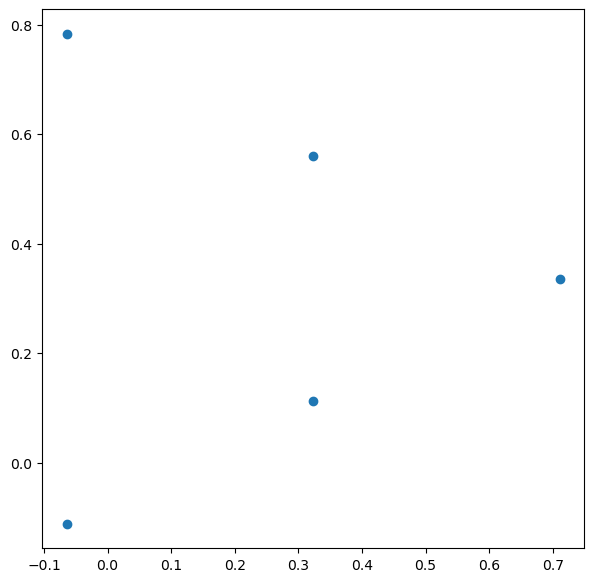

[0 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[0 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


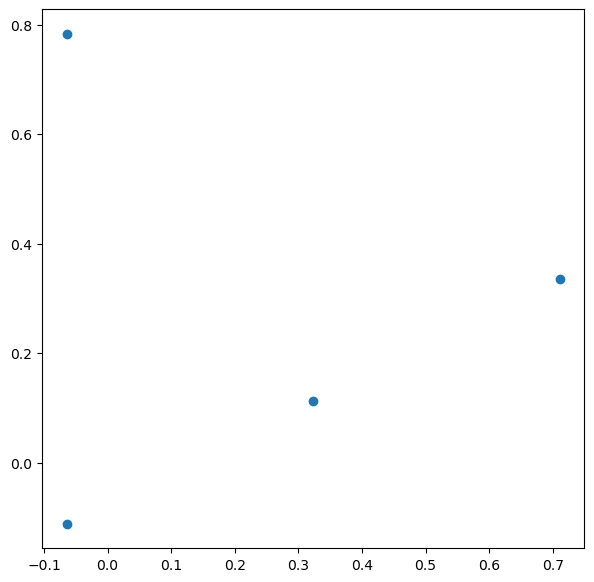

[0 4]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 4 pos; [0.         0.63300014 0.        ]
[0 4]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 4 pos; [0.         0.63300014 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


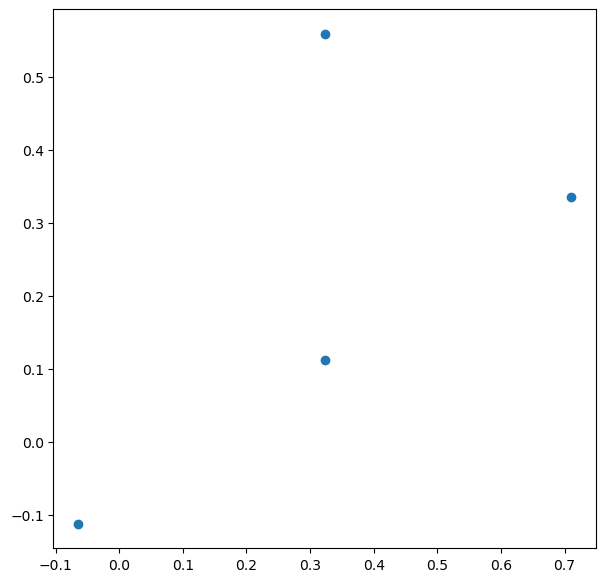

[0 4 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[0 4 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


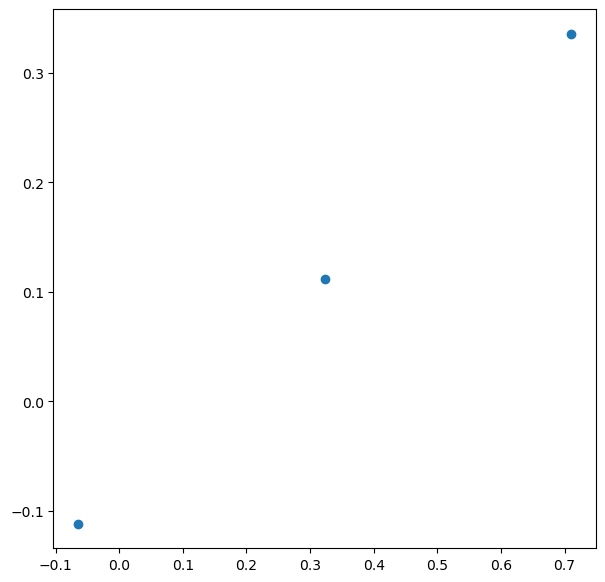

[0 3]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
[0 3]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


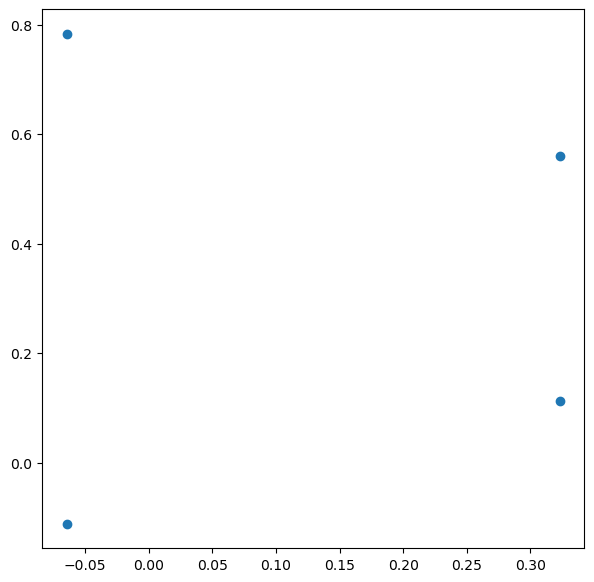

[0 3 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[0 3 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


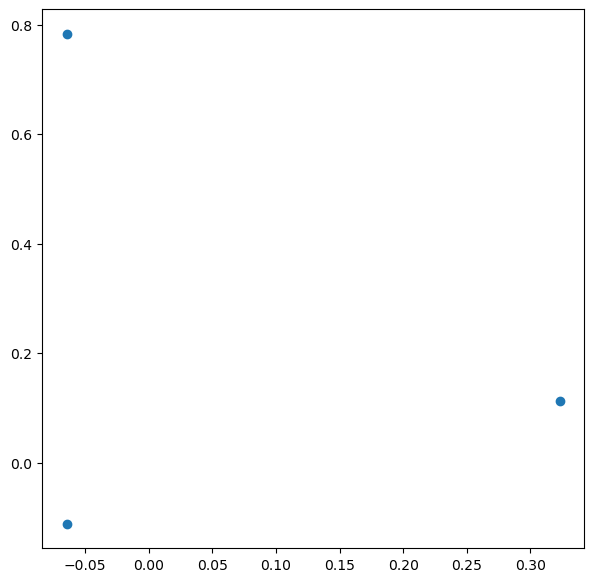

[0 3 4]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
[0 3 4]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


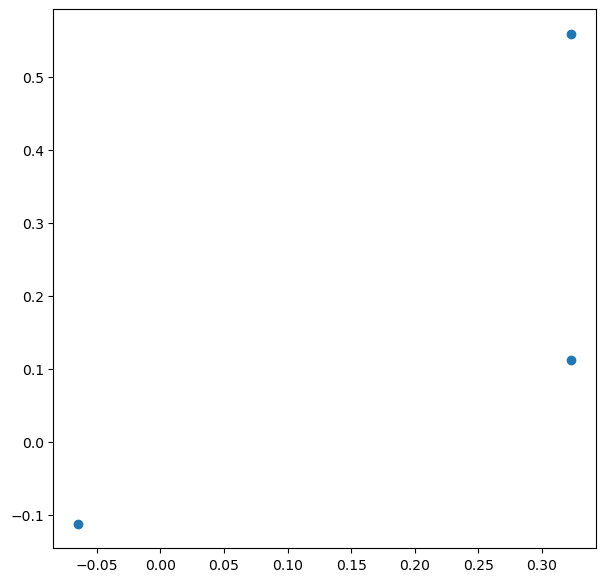

[0 3 4 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[0 3 4 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


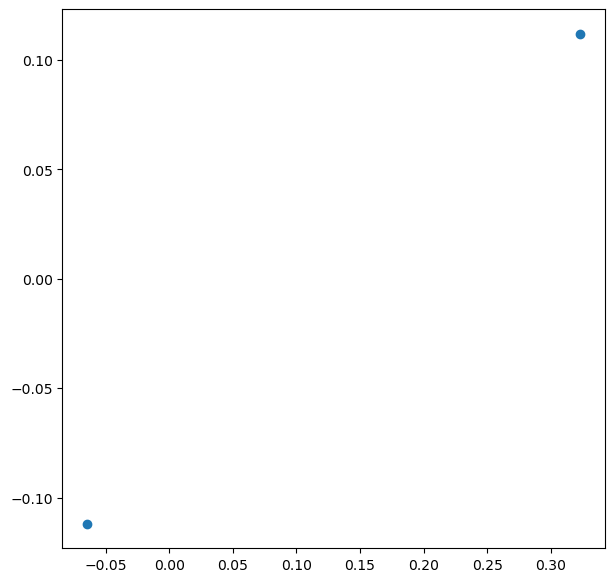

[0 2]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
[0 2]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


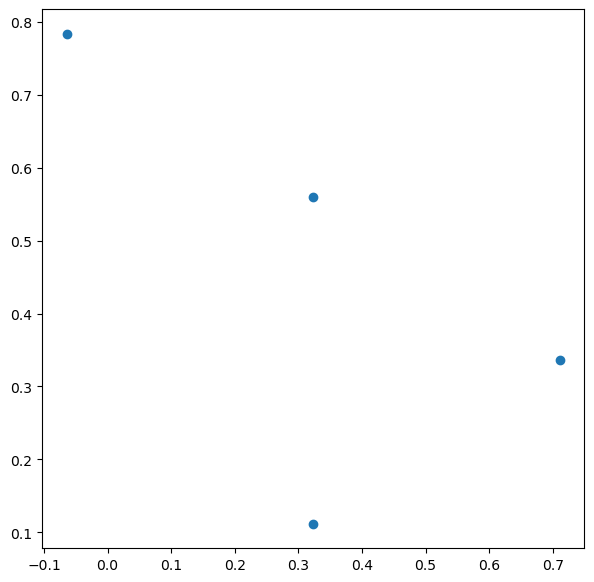

[0 2 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[0 2 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


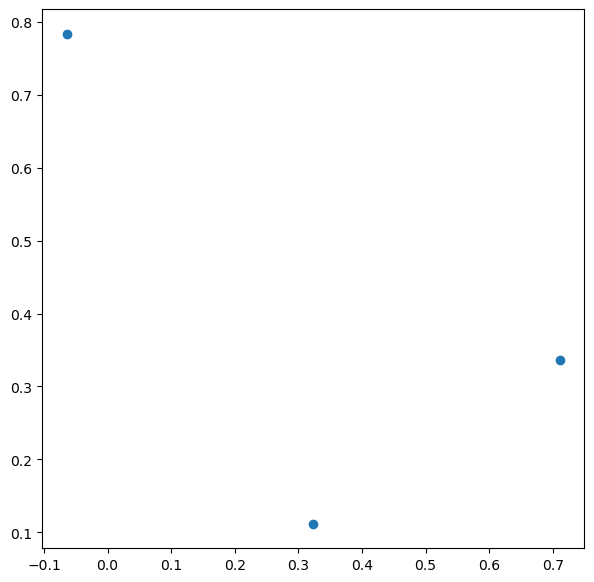

[0 2 4]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 4 pos; [0.         0.63300014 0.        ]
[0 2 4]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 4 pos; [0.         0.63300014 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


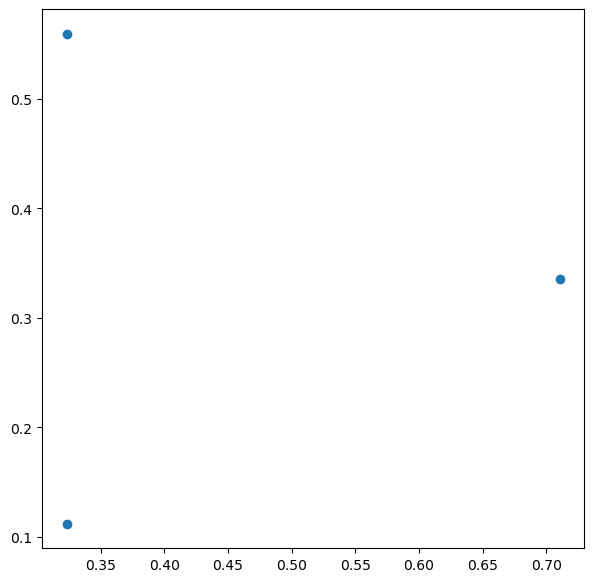

[0 2 4 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[0 2 4 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


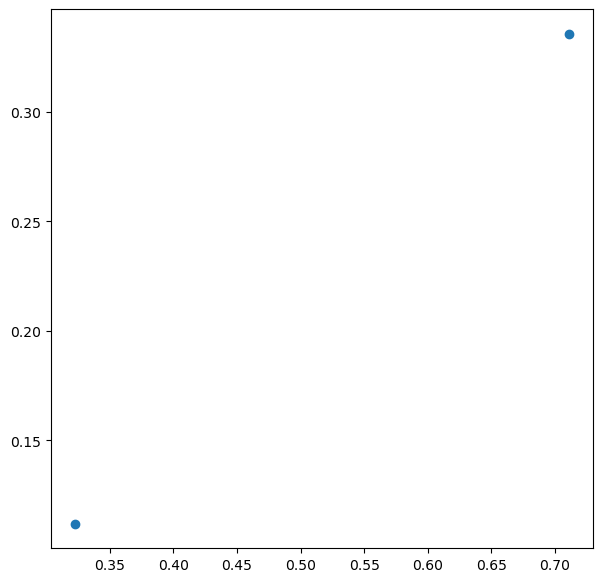

[0 2 3]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
[0 2 3]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


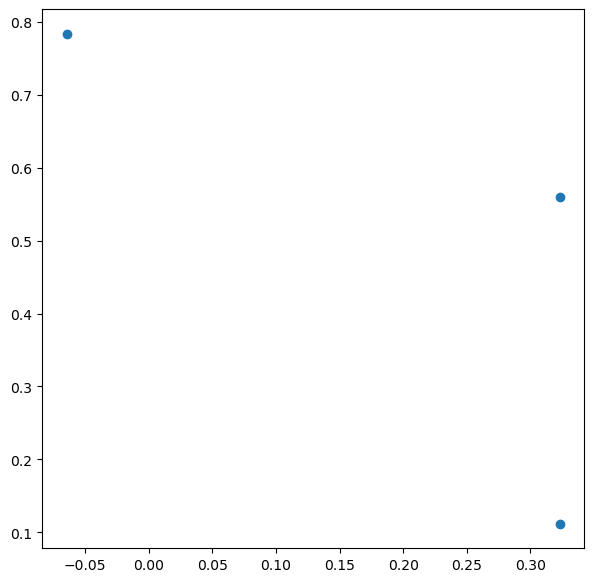

[0 2 3 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[0 2 3 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


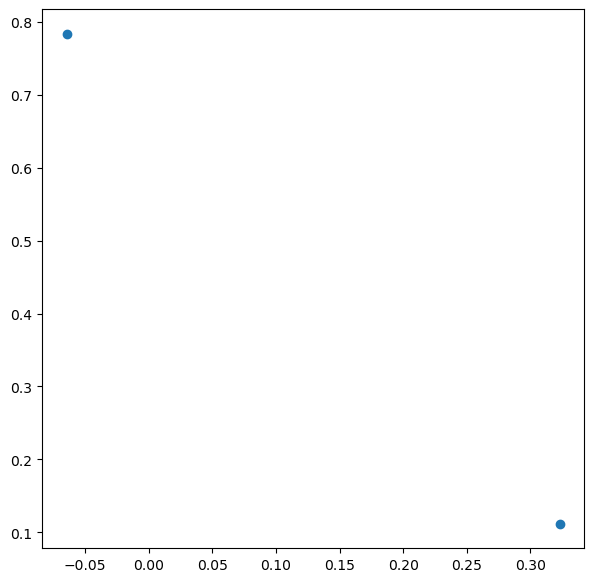

[0 2 3 4]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
[0 2 3 4]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


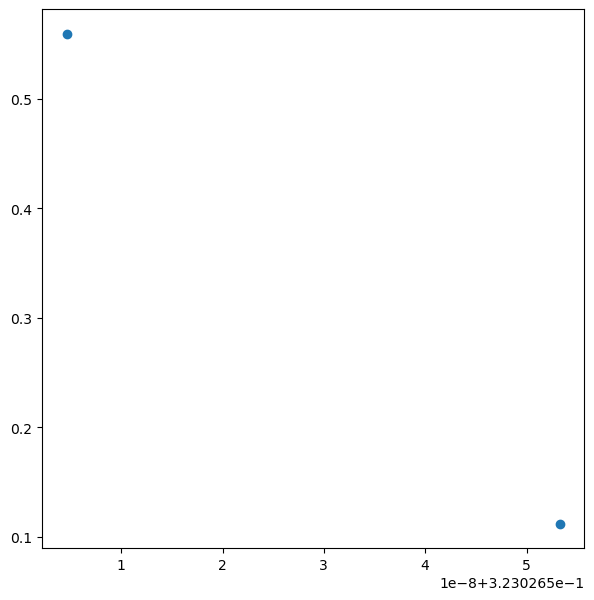

[0 2 3 4 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[0 2 3 4 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


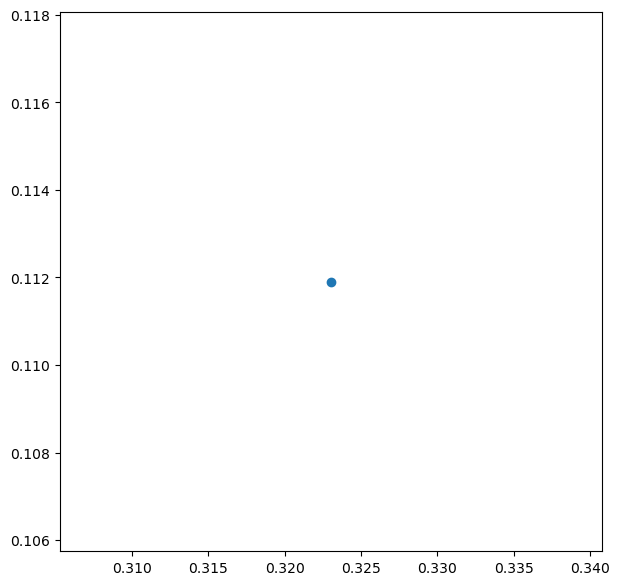

[0 1]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
[0 1]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


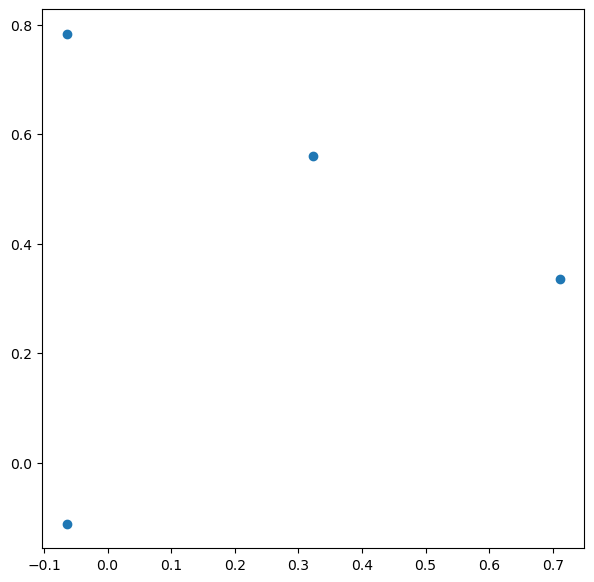

[0 1 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[0 1 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


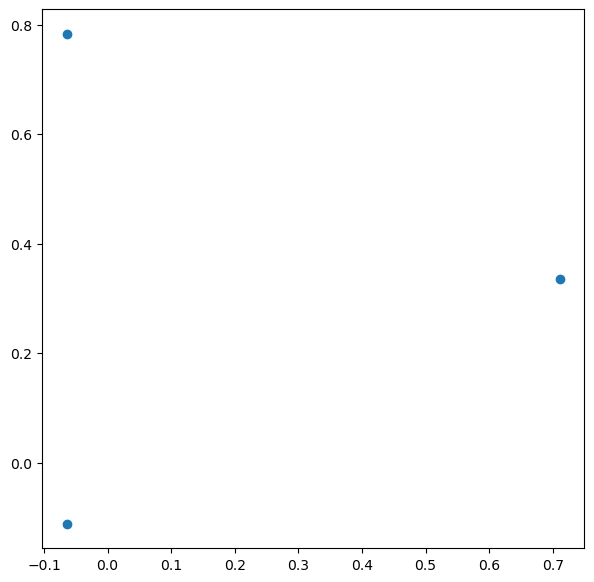

[0 1 4]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 4 pos; [0.         0.63300014 0.        ]
[0 1 4]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 4 pos; [0.         0.63300014 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


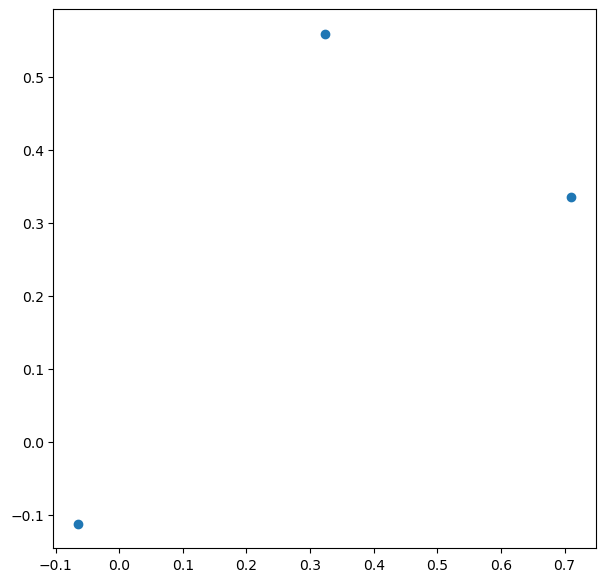

[0 1 4 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[0 1 4 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


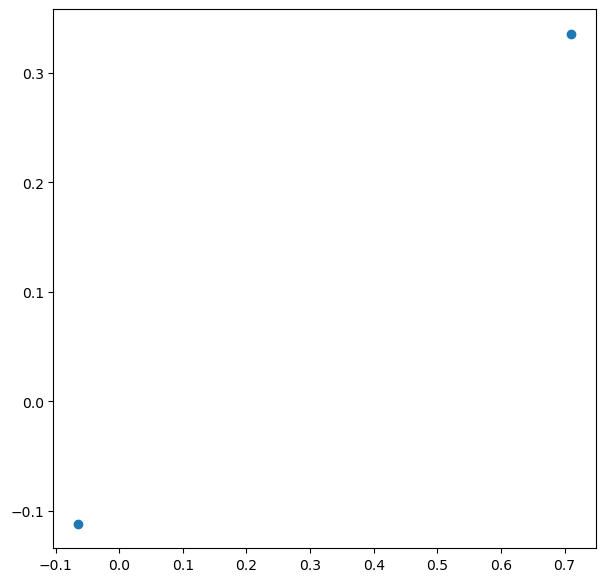

[0 1 3]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
[0 1 3]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


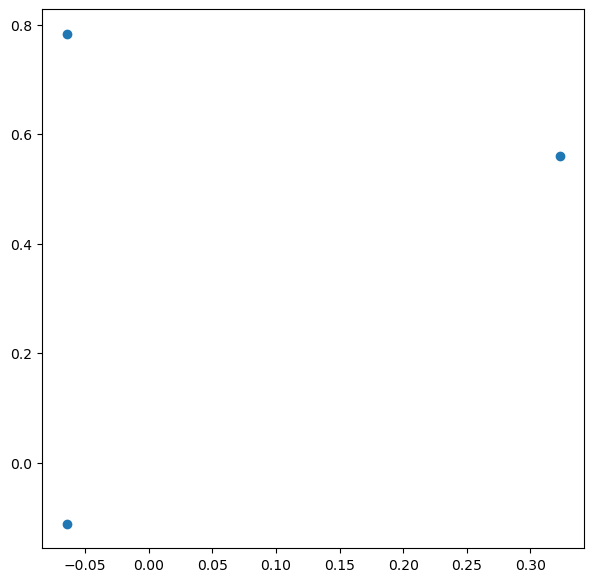

[0 1 3 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[0 1 3 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


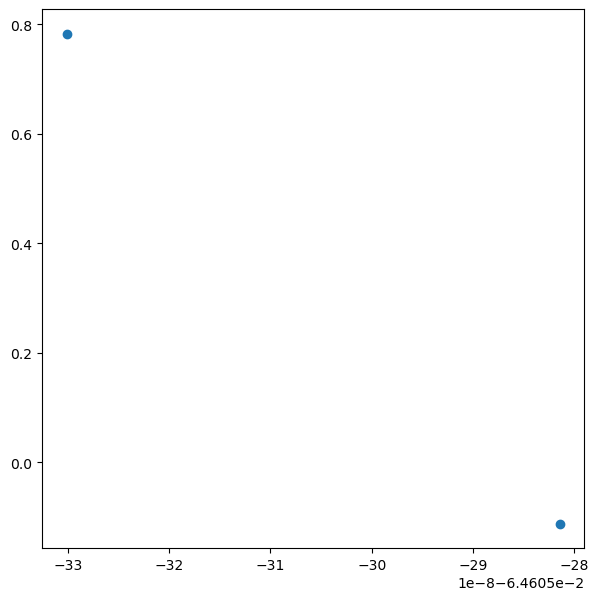

[0 1 3 4]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
[0 1 3 4]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


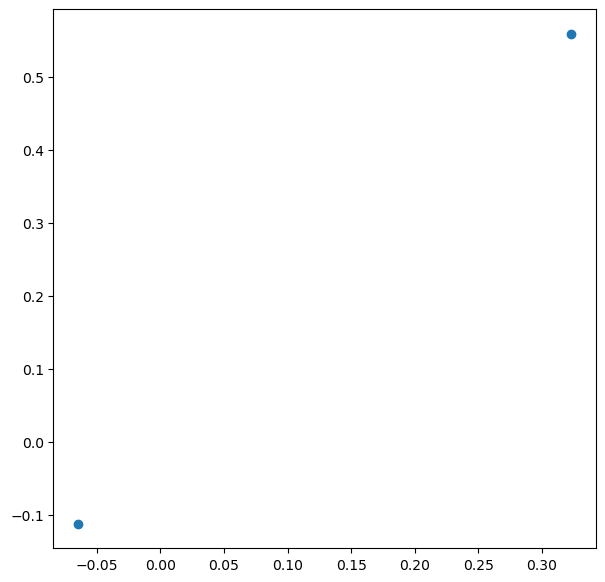

[0 1 3 4 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[0 1 3 4 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799109059328


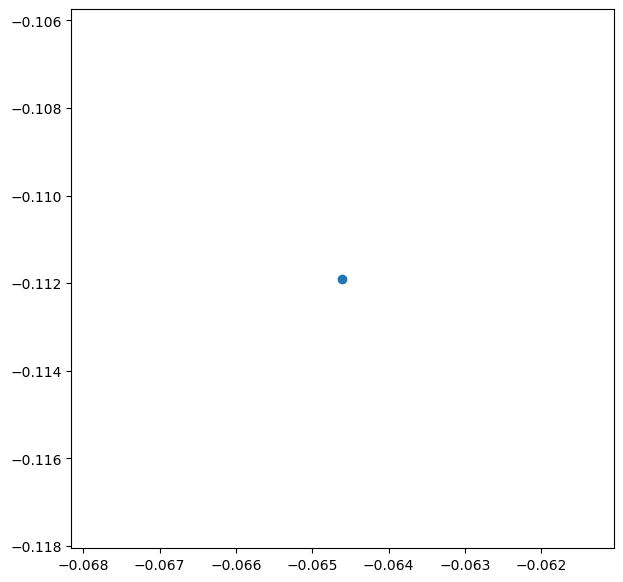

[0 1 2]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
[0 1 2]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799040233813


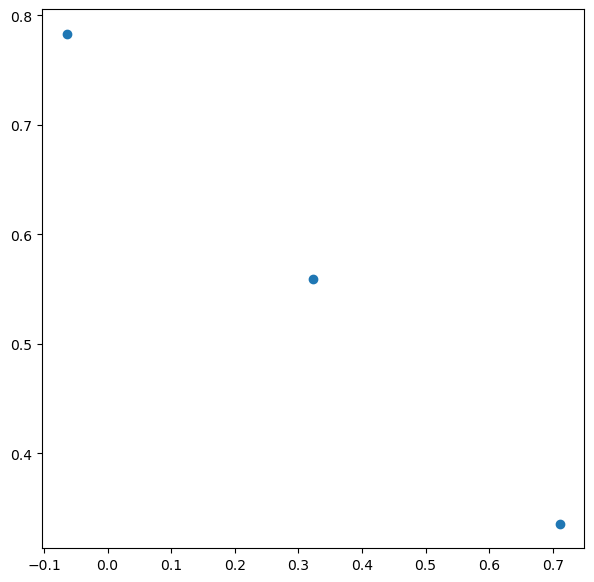

[0 1 2 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[0 1 2 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799040233813


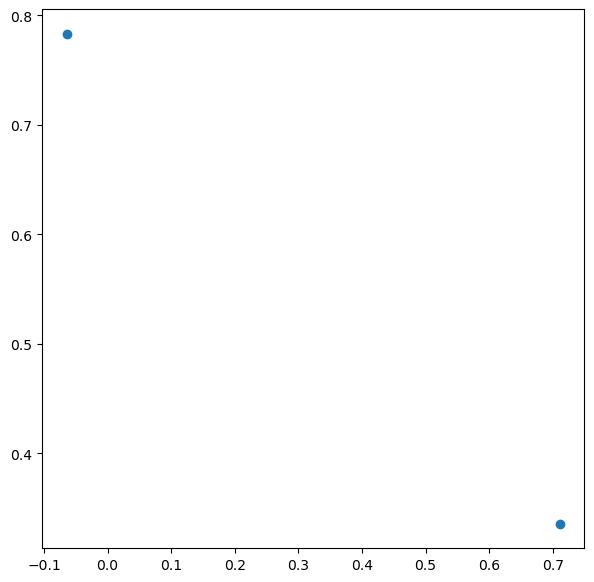

[0 1 2 4]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 4 pos; [0.         0.63300014 0.        ]
[0 1 2 4]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 4 pos; [0.         0.63300014 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799040233813


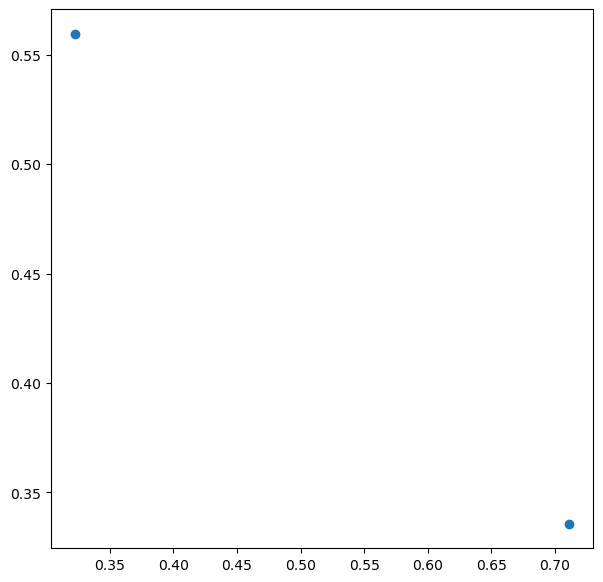

[0 1 2 4 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[0 1 2 4 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 4 pos; [0.         0.63300014 0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799040233813


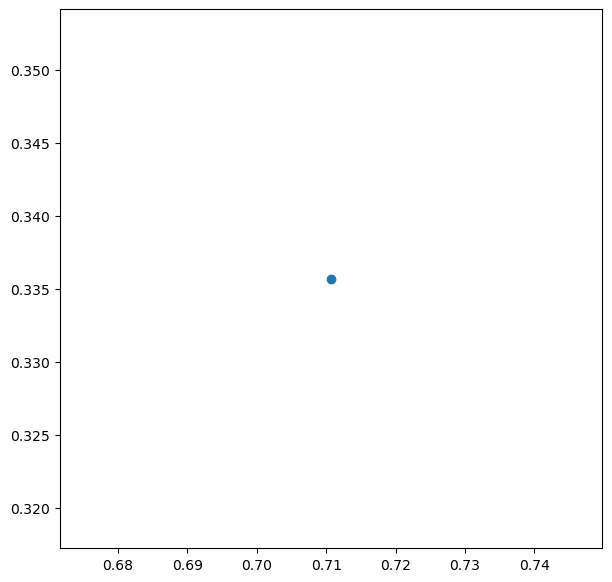

[0 1 2 3]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
[0 1 2 3]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799040233813


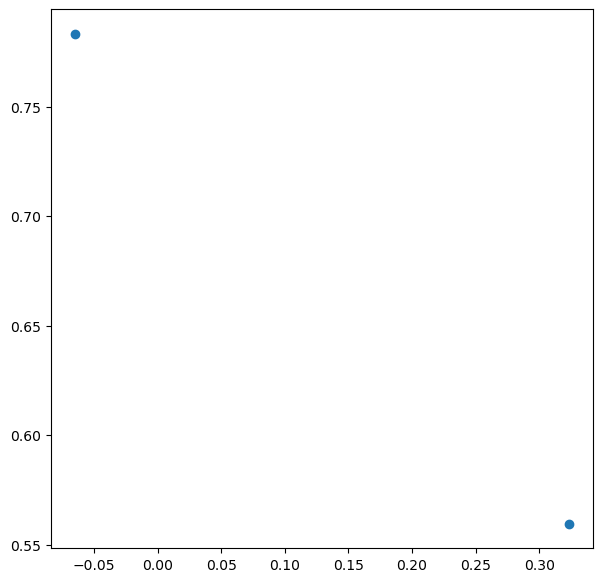

[0 1 2 3 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
[0 1 2 3 5]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 5 pos; [0.31650007 0.31650007 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799040233813


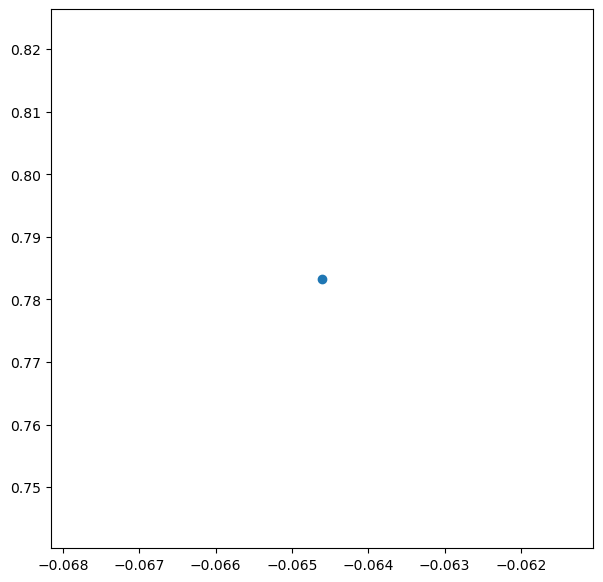

[0 1 2 3 4]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
[0 1 2 3 4]
ind; 0 pos; [0.         0.31650007 0.31649995]
ind; 1 pos; [0.31650007 0.         0.31649995]
ind; 2 pos; [0.         0.         0.63300002]
ind; 3 pos; [0.63300014 0.         0.        ]
ind; 4 pos; [0.         0.63300014 0.        ]
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:09 / ETA: 0:00:00
-3.197799040233813


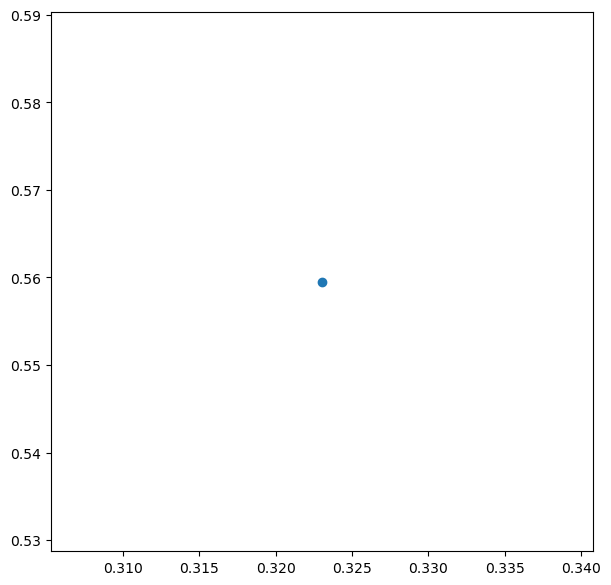

In [12]:
l_model = 4.0

for plane_ind in range(len(plane_dists)):
    n = len(plane_inds[plane_ind])
    num_combinations = 2**n
    integers = np.arange(num_combinations)
    combinations = ((integers[:, None] & (1 << np.arange(n)[::-1])) > 0).astype(int)
    print(combinations)

    for combination in combinations:
        if np.min(combination) > 0:
            continue
    
        def vacancy():
            @pb.site_state_modifier
            def modifier(state, x, y, z):
                xp = x - offsets[0]
                yp = y - offsets[1]
                zp = z - offsets[2]
                
                state[xp < 0.0] = False
                state[yp < 0.0] = False
                state[zp < 0.0] = False

                vacancies_inds = np.nonzero(combination)[0]
                print(vacancies_inds)
                for ind in vacancies_inds:
                    vacancy_pos = pos[plane_inds[plane_ind][ind], :]
                    #print("ind;", ind, "pos;", vacancy_pos)
                    state[(xp - vacancy_pos[0])**2 + (yp - vacancy_pos[1])**2 + (zp - vacancy_pos[2])**2 < 1e-4] = False

                
                
                state[xp + yp + zp < plane_dists[plane_ind] - 1e-3] = False
                mask = (xp + yp + zp < plane_dists[plane_ind] - 1e-3) & (xp >= 0.0) & (yp >= 0.0) & (zp >= 0.0)
                #print(xp[mask], yp[mask], zp[mask], ";", plane_dists[plane_ind])
                
                return state
            return modifier
        
        model = pb.Model(
            lattice, 
            cube(l_model),
            vacancy(),
        )
    
        E_range = 1
        E_reso = 200
        gamma = 0.1 
        
        kpm = pb.kpm(model)
        
        energies = np.linspace(-E_range, E_range, E_reso)
        l_ldos = l_model
        
        spatial_ldos = kpm.calc_spatial_ldos(energy=energies, broadening=0.1, shape=cube(l_ldos))
        
        smap = spatial_ldos.structure_map(0)
        
        ldos_data = np.array(smap.data,ndmin=1)
        ldos_positions = np.transpose(np.array(smap.positions))
    
        rotation = rot2 @ rot1
        ldos_positions = (rotation @ ldos_positions.T).T
    
        minimum = ldos_positions[:, 2].min()
        mask = (ldos_positions[:, 2] - minimum) < 1e-2
        print(minimum)
        plt.scatter(ldos_positions[mask, 0], ldos_positions[mask, 1])
        plt.show()
        
        num_pts = ldos_positions.shape[0]
        ldos = np.zeros((energies.shape[0], num_pts, 4)) #an array where I put all the LDOS at all energies
        i=0
        for energy in energies:
            smap = spatial_ldos.structure_map(energy)
            ldos_data = np.array(smap.data,ndmin=1)
            ldos[i,:,0:3] = ldos_positions[:,0:3]
            ldos[i,:,3] = ldos_data
            i +=1

        ldos = ldos[:, mask, :]
        ldos[:, :, 2] -= minimum
        np.save("tip_ldos/111tip_ldos_plane=" + str(plane_ind) + "_" + ''.join(np.where(combination == 0, 'O', 'X')) + ".npy", ldos)
        

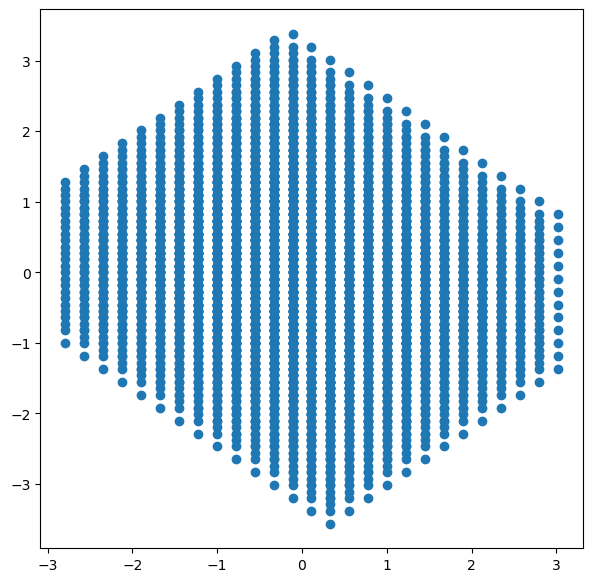

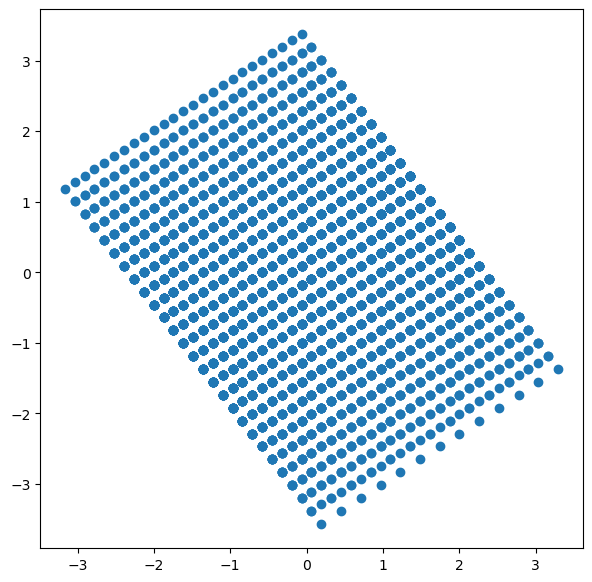

In [53]:
plt.scatter(ldos_positions[:, 1], ldos_positions[:, 2])
plt.show()

plt.scatter(ldos_positions[:, 0], ldos_positions[:, 2])
plt.show()

In [55]:
rotation @ (np.array([-2, -2, -2]).T)

array([ 0.        ,  0.        , -3.46410162])

In [15]:
z_levels = np.sort(ldos[0,:,2])[::-1]
print(z_levels)

second_row_z = z_levels[1]

[-0.15825009 -0.31649995 -0.31649995 -0.47475004 -0.47475004 -0.47475004
 -0.47475004 -0.47475004 -0.47475004 -0.63300014 -0.63300014 -0.63300014
 -0.63300014 -0.63300014 -0.63300014 -0.63300014 -0.63300014 -0.63300014
 -0.63300014 -0.63300014 -0.63300014 -0.79125023 -0.79125023 -0.79125023
 -0.79125023 -0.79125023 -0.79125023 -0.79125023 -0.79125023 -0.79125023
 -0.94950008 -0.94950008 -0.94950008 -0.94950008 -0.94950008 -0.94950008
 -0.94950008 -0.94950008 -0.94950008 -0.94950008 -0.94950008 -0.94950008
 -0.94950008 -0.94950008 -0.94950008 -0.94950008 -1.10775018 -1.10775018
 -1.10775018 -1.10775018 -1.10775018 -1.10775018 -1.10775018 -1.10775018
 -1.10775018 -1.26600003 -1.26600003 -1.26600003 -1.26600003 -1.26600003
 -1.26600003 -1.26600003 -1.26600003 -1.26600003 -1.26600003 -1.26600003
 -1.26600003 -1.26600003 -1.26600003 -1.26600003 -1.26600003 -1.42425013
 -1.42425013 -1.42425013 -1.42425013 -1.42425013 -1.42425013 -1.42425013
 -1.42425013 -1.42425013 -1.58249998 -1.58249998 -1

In [16]:
first_two_rows = ldos[:, ldos[0,:,2] >= second_row_z, :]

print(first_two_rows)

def normalize_and_save_tip_ldos(tip_ldos):
    tip_ldos = np.copy(tip_ldos)
    tip_ldos[:, :, 2] *= -1
    tip_ldos[:, :, 2] -= np.min(tip_ldos[:, :, 2])

    np.save("tip_ldos.npy", tip_ldos)
    print(tip_ldos)

normalize_and_save_tip_ldos(first_two_rows)

[[[ 0.          0.         -0.15825009  0.12792306]
  [-0.15825009 -0.15825009 -0.31649995  0.03384349]
  [-0.15825009  0.15824986 -0.31649995  0.03384354]]

 [[ 0.          0.         -0.15825009  0.13549556]
  [-0.15825009 -0.15825009 -0.31649995  0.03439249]
  [-0.15825009  0.15824986 -0.31649995  0.03439259]]

 [[ 0.          0.         -0.15825009  0.14319679]
  [-0.15825009 -0.15825009 -0.31649995  0.03503186]
  [-0.15825009  0.15824986 -0.31649995  0.03503191]]

 ...

 [[ 0.          0.         -0.15825009  0.12316652]
  [-0.15825009 -0.15825009 -0.31649995  0.04011255]
  [-0.15825009  0.15824986 -0.31649995  0.0401125 ]]

 [[ 0.          0.         -0.15825009  0.12576321]
  [-0.15825009 -0.15825009 -0.31649995  0.04069382]
  [-0.15825009  0.15824986 -0.31649995  0.04069378]]

 [[ 0.          0.         -0.15825009  0.12805882]
  [-0.15825009 -0.15825009 -0.31649995  0.04113235]
  [-0.15825009  0.15824986 -0.31649995  0.0411323 ]]]
[[[ 0.          0.          0.          0.1279

In [5]:
sx = 1
pxls = 64
kappa = -11.2
LDOSes = ldos
E_oi = 0.5
L = 2

In [6]:
x_grid = np.linspace((-L/2)*sx, sx*L/2, pxls)
y_grid = np.linspace(-L/2, L/2, pxls)
c = 3/(5.29e-2) #constant used in the computation of Psi (3/(5.29e-11) in meters-1)
E_step = (2*E_range)/(LDOSes.shape[0]-1)
index_of_E_zero = LDOSes.shape[0] // 2 #gives the index of energy = 0
i_max = int(np.round(np.absolute(E_oi + E_range)/E_step))
num_of_atoms = LDOSes.shape[1]
sum_LDOS = np.zeros((num_of_atoms,1))
LDOS_temp = np.zeros((num_of_atoms,1))

In [7]:
ind0 = min(index_of_E_zero,i_max)
ind1 = max(index_of_E_zero,i_max) + 1
sum_LDOS = np.zeros((num_of_atoms,1))

for i in range(ind1 - ind0):
    sum_LDOS += (LDOS_sample[ind0 + i,:,3] * LDOS_tip[ind1 - 1 - i,:,3])[:, None]

NameError: name 'LDOS_sample' is not defined

In [22]:

from os import listdir
from os.path import isfile, join

def get_all_tip_shapes(folder):
    return [f for f in listdir(folder) if ".npy" in f]

print(get_all_tip_shapes("tip_ldos"))

['111tip_ldos_plane=0_O.npy', '111tip_ldos_plane=1_OOO.npy', '111tip_ldos_plane=1_OOX.npy', '111tip_ldos_plane=1_OXO.npy', '111tip_ldos_plane=1_OXX.npy', '111tip_ldos_plane=1_XOO.npy', '111tip_ldos_plane=1_XOX.npy', '111tip_ldos_plane=1_XXO.npy', '111tip_ldos_plane=2_O.npy', '111tip_ldos_plane=3_OOOOOO.npy', '111tip_ldos_plane=3_OOOOOX.npy', '111tip_ldos_plane=3_OOOOXO.npy', '111tip_ldos_plane=3_OOOOXX.npy', '111tip_ldos_plane=3_OOOXOO.npy', '111tip_ldos_plane=3_OOOXOX.npy', '111tip_ldos_plane=3_OOOXXO.npy', '111tip_ldos_plane=3_OOOXXX.npy', '111tip_ldos_plane=3_OOXOOO.npy', '111tip_ldos_plane=3_OOXOOX.npy', '111tip_ldos_plane=3_OOXOXO.npy', '111tip_ldos_plane=3_OOXOXX.npy', '111tip_ldos_plane=3_OOXXOO.npy', '111tip_ldos_plane=3_OOXXOX.npy', '111tip_ldos_plane=3_OOXXXO.npy', '111tip_ldos_plane=3_OOXXXX.npy', '111tip_ldos_plane=3_OXOOOO.npy', '111tip_ldos_plane=3_OXOOOX.npy', '111tip_ldos_plane=3_OXOOXO.npy', '111tip_ldos_plane=3_OXOOXX.npy', '111tip_ldos_plane=3_OXOXOO.npy', '111tip_ld

In [24]:
tip_ldos = np.load('tip_ldos/111tip_ldos_plane=1_OOO.npy')

In [28]:
print(np.sum(tip_ldos[:, :, 2] - np.mean(tip_ldos[:, :, 2])))

-2.6645352591003757e-13
